In [2]:
# jupyter setup boilerplate
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


from fitting import *

import json
import datetime

from qualang_tools.plot import Fit

import pprint as pp

from plotting_helpers import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load InstrumentManagerWindow
2025-04-15 15:08:20,674 - qm - INFO     - Starting session: 4558a10d-d712-477b-9e17-68a3c6dc86dc


In [27]:
global_data_path = r"M:/malab/_Data/PUR1D4/20250410 - cooldown 6/20250422 - Santi - RFSoC tprocv2 - char4-5GHz"
expt_path = r"\setup"
global_data_path = global_data_path + expt_path

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']


### Time Of Flight

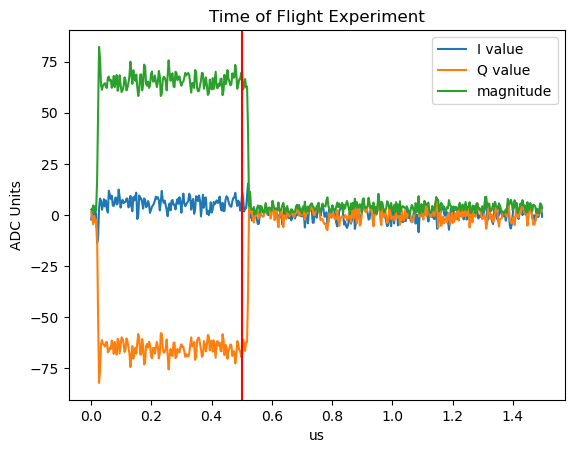

In [19]:
# data = global_data_path + r"\00001_tof_mux_Q0_2025-03-25.h5"
data = global_data_path + r"\00001_tof_Q7_2025-04-22.h5"

with SlabFile(data, 'r') as f:
    t = array(f['t'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    config = f.attrs['config']
    config = json.loads(config)

# pp.pprint(config)

# Plot results.
plt.plot(t, I, label="I value")
plt.plot(t, Q, label="Q value")
plt.plot(t, np.abs(I + 1j*Q), label="magnitude")
plt.legend()
plt.ylabel("ADC Units")
plt.xlabel("us");
plt.title('Time of Flight Experiment')
######## SET THIS VALUE AS YOUR config['trig_time'] #########
plt.axvline(0.5, c='r') 

### Resonator Spectroscopy

#### single Resonator Spectrosocpy


 data path: M:/malab/_Data/PUR1D4/20250410 - cooldown 6/20250422 - Santi - RFSoC tprocv2 - char4-5GHz\setup\00004_res_spec_ge_Q7_2025-04-22.h5
min amp at  6272.765488243103 MHz
{'f': [6272.894099075154, 0.007392403150653249],
 'fit_func': <function Fit.reflection_resonator_spectroscopy.<locals>.<lambda> at 0x000001C9A8F4FC40>,
 'k': [0.7331227847006772, 0.02517518952067854],
 'kc': [10.46630430433913, 0.007253469658533923],
 'ki': [-9.733181519638453, 0.017921719862144615],
 'offset': [1610.0815540951385, 121.77956399948143],
 'slope': [-0.2537560451272715, -0.019403758938113122]}


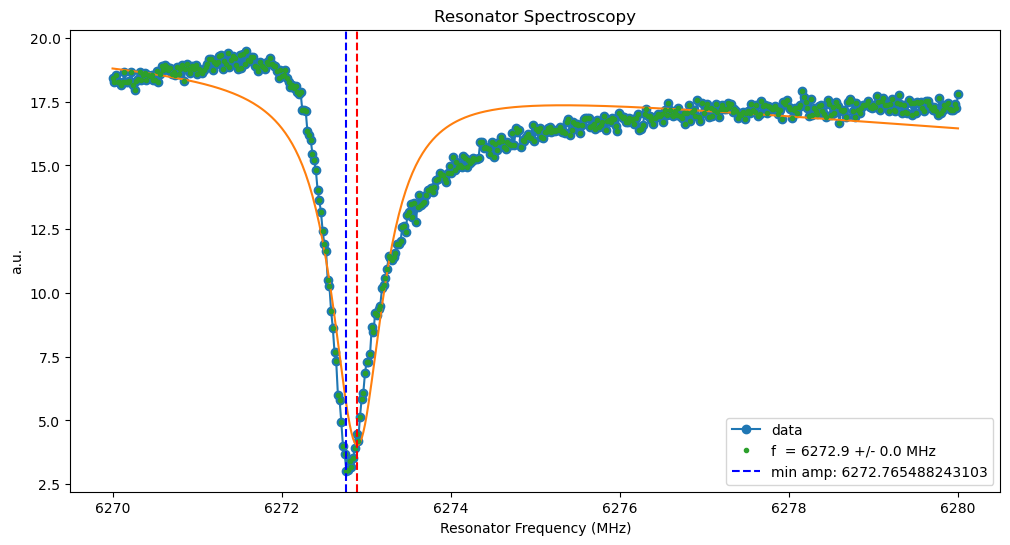

In [21]:
data = global_data_path + r"\00004_res_spec_ge_Q7_2025-04-22.h5"

with SlabFile(data, 'r') as f:
    freqs = array(f['fpts'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

# pp.pprint(config)

print('\n data path:', data)
plt.figure(figsize=(12,6))
plt.plot(freqs, amps, marker='o', label = 'data')
# plt.plot(freqs, y_fit, marker='', label = 'Fitted data')
plt.ylabel("a.u.")
plt.xlabel("Resonator Frequency (MHz)")
plt.title('Resonator Spectroscopy')

fit = Fit()
fit_results = fit.reflection_resonator_spectroscopy(freqs, amps, plot=True)
plt.axvline(fit_results['f'][0], marker='', c='red', linestyle='--')
plt.axvline(freqs[np.argmin(amps)], marker='', c='blue', linestyle='--', label='min amp: ' + str(freqs[np.argmin(amps)]))
print('min amp at ', str(freqs[np.argmin(amps)]), 'MHz')
pp.pprint(fit_results)
plt.legend()

plt.show()


#### MUX Resonator Spectrosocpy

data path: M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250414 - Santi - RFSoC tprocv2 - char4100MHz\q0q1 - avoided_crossing\00001_res_spec_ge_mux_2025-04-14.h5
{'expts': 500,
 'flux_freq': 0,
 'flux_gain': 0,
 'flux_length': 0,
 'freqs': [6246.8114551925655,
           6171.950609588623,
           6306.407471122742,
           6206.6131887054435,
           6131.767677688599,
           6229.330059585572,
           6155.068061256408,
           6277.60604473114],
 'mixer_freq': 6000,
 'mux_ch': 4,
 'mux_ro_chs': [2, 3, 4, 5, 6, 7, 8, 9],
 'nqz_qubit': 1,
 'nqz_res': 2,
 'py_avg': 10,
 'qubit_ch': 0,
 'qubit_ch_ef': 0,
 'qubit_freq_ef': 0,
 'qubit_freq_ge': 4862.785289327412,
 'qubit_gain_ef': 0,
 'qubit_gain_ge': 0.05,
 'qubit_length_ef': 25.0,
 'qubit_length_ge': 20,
 'qubit_phase': 0,
 'relax_delay': 0.5,
 'reps': 100,
 'res_ch': 1,
 'res_freq_ef': [0, 0, 0, 0, 0, 0, 0, 0],
 'res_gain_ef': [0, 0, 0, 0, 0, 0, 0, 0],
 'res_gain_ge': [0.1, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0

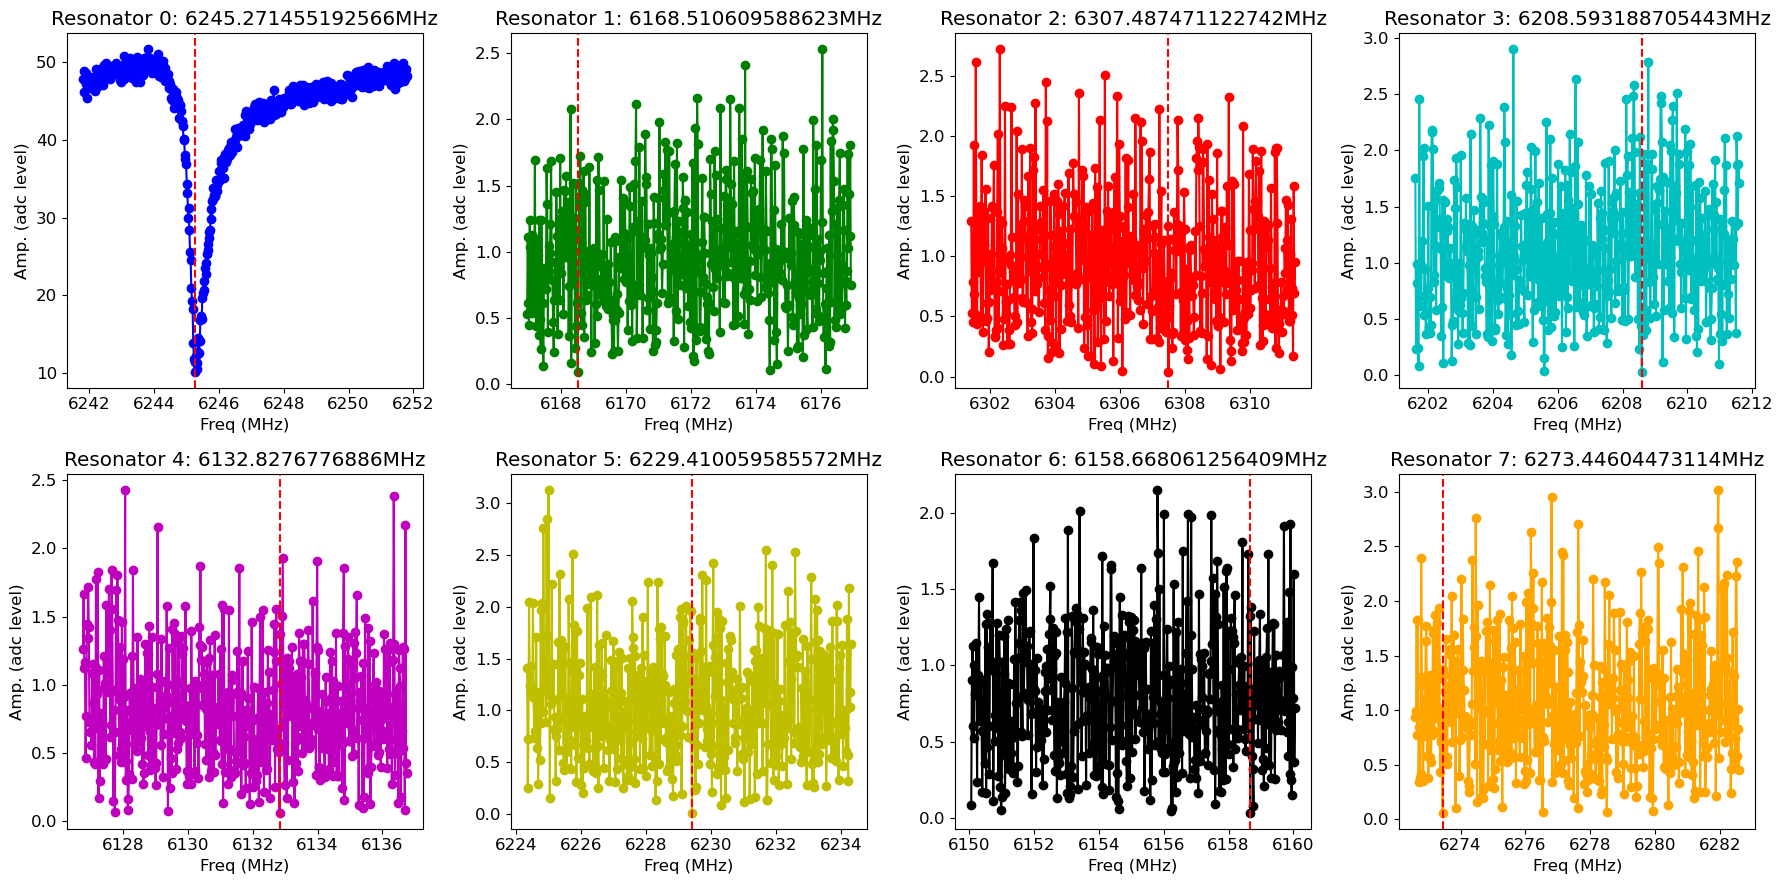

In [30]:
data = global_data_path + r"\00001_res_spec_ge_mux_2025-04-14.h5"
# data = r"M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250220 - fullchipchar - flux\setup" + r"\00000_res_spec_ge_mux_2025-02-20.h5"

print('data path:', data)
with SlabFile(data, 'r') as f:
    fpts = array(f['fpts'])[0]
    amps = array(f['amps'])[0]
    avgi = array(f['avgi'])[0]
    avgq = array(f['avgq'])[0]
    fcenter = array(f['fcenter'])[0]
    config = f.attrs['config']
    config = json.loads(config)

pp.pprint(config)

res_freqs = []
plt.figure(figsize=(18,9))
plt.rcParams.update({'font.size': 12})  # Set base font size
num_res = 8

for i in range(num_res):
    plt.subplot(241+i, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
    plt.plot(fpts+fcenter[i], amps[i],'o-',label="amp", c = colors[i])
    freq_r = fpts[np.argmin(amps[i])]+fcenter[i]
    res_freqs.append(freq_r)
    plt.axvline(freq_r, linestyle='--', color='red')
    plt.title('Resonator ' + str(i) + ': ' + str(freq_r) + 'MHz')

# plt.subplot(231, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[0], amps[0],'o-',label="amp")
# freq_r1 = fpts[np.argmin(amps[0])]+fcenter[0]
# res_freqs.append(freq_r1)
# plt.axvline(freq_r1, linestyle='--', color='red')
# plt.title('Resonator 0: ' + str(freq_r1) + 'MHz')

# plt.subplot(232, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[1], amps[1],'o-',label="amp")
# freq_r2 = fpts[np.argmin(amps[1])]+fcenter[1]
# res_freqs.append(freq_r2)
# plt.axvline(freq_r2, linestyle='--', color='red')
# plt.title('Resonator 1: ' + str(freq_r2) + 'MHz')

# plt.subplot(233, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[2], amps[2],'o-',label="amp")
# freq_r3 = fpts[np.argmin(amps[2])]+fcenter[2]
# res_freqs.append(freq_r3)
# plt.axvline(freq_r3, linestyle='--', color='red')
# plt.title('Resonator 2: ' + str(freq_r3) + 'MHz')

# plt.subplot(234, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[3], amps[3],'o-',label="amp")
# freq_r4 = fpts[np.argmin(amps[3])]+fcenter[3]
# res_freqs.append(freq_r4)
# plt.axvline(freq_r4, linestyle='--', color='red')
# plt.title('Resonator 3: ' + str(freq_r4) + 'MHz')

# plt.subplot(235, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[4], amps[4],'o-',label="amp")
# freq_r5 = fpts[np.argmin(amps[4])]+fcenter[4]
# res_freqs.append(freq_r5)
# plt.axvline(freq_r5, linestyle='--', color='red')
# plt.title('Resonator 4: ' + str(freq_r5) + 'MHz')

# plt.subplot(236, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[5], amps[5],'o-',label="amp")
# freq_r6 = fpts[np.argmin(amps[5])]+fcenter[5]
# res_freqs.append(freq_r6)
# plt.axvline(freq_r6, linestyle='--', color='red')
# plt.title('Resonator 5: ' + str(freq_r6) + 'MHz')

plt.tight_layout()

print(res_freqs)

Fitting Resonators

In [200]:
### Fit ###
fit = Fit()

fit_results = {
    'res0':{},
    'res1':{},
    'res2':{},
    'res3':{},
    'res4':{},
    'res5':{},
    'res6':{},
    'res7':{}
}

y_fits = []

for i in range(len(fcenter)):

    freqs = fpts+fcenter[i]

    # Choose the suitable fitting function
    fit_result = fit.reflection_resonator_spectroscopy(freqs, amps[i])

    result = {
            "f": fit_result['f'],
            "kc": fit_result['kc'],
            "ki": fit_result['ki'],
            "k": fit_result['k'],
            "offset": fit_result['offset'],
            "slope": fit_result['slope']
        }
    fit_results['res' + str(i)] = result
    f_r = result['f'][0]
    kc = result['kc'][0]
    k = result['k'][0]
    offset = result['offset'][0]
    slope = result['slope'][0]
    yfit = (offset)-((kc/k) / (1 + (4 * ((freqs - f_r) ** 2) / (k ** 2)))) + slope * freqs
    y_fits.append(yfit)

pp.pprint(fit_results)

{'res0': {'f': [6245.389865043648, 0.0014024899555632525],
          'k': [0.530601569457132, 0.004773278672273566],
          'kc': [14.680948977000735, 0.0006950666222549454],
          'ki': [-14.150347407543602, 0.004078212050018621],
          'offset': [267.24234151759185, 132.57185222250143],
          'slope': [-0.03577540798139106, 0.021224776657482004]},
 'res1': {'f': [6170.00418012731, 0.007967885251132071],
          'k': [0.9000090563451625, 0.030617762773557995],
          'kc': [25.751990628242428, 0.015394562667135877],
          'ki': [-24.851981571897266, 0.015223200106422119],
          'offset': [14802.46051046381, 598.1095610798042],
          'slope': [-2.392247171499338, -0.0969236845200179]},
 'res2': {'f': [6303.321482618299, 0.007938646528273386],
          'k': [1.043732593525557, 0.0322730811137931],
          'kc': [31.586733832659956, 0.014894577800806497],
          'ki': [-30.543001239134398, 0.017378503312986605],
          'offset': [17048.98004139006

Plotting with the fit...

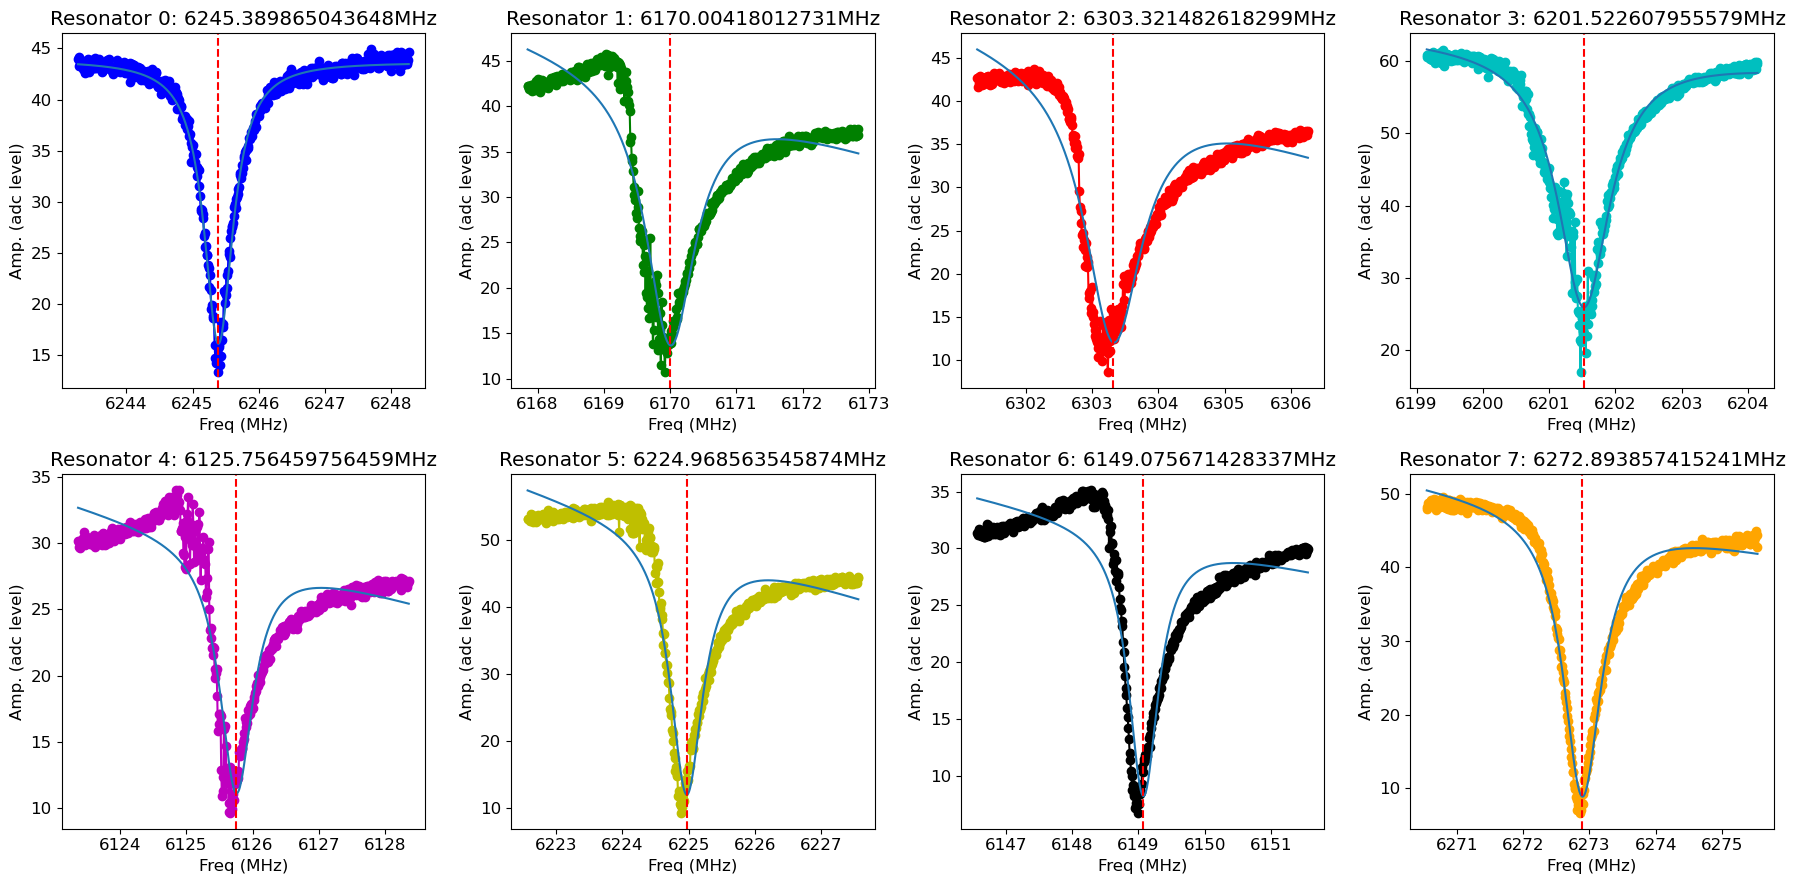

In [201]:
plt.figure(figsize=(18,9))
plt.rcParams.update({'font.size': 12})  # Set base font size

for i in range(num_res):
    plt.subplot(241+i, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
    plt.plot(fpts+fcenter[i], amps[i],'o-',label="amp", c = colors[i])
    plt.plot(fpts+fcenter[i], y_fits[i], marker='', label = 'Fitted data')
    plt.axvline(fit_results['res' + str(i)]['f'][0], linestyle='--', color='red')
    plt.title('Resonator ' + str(i) + ': ' + str(fit_results['res' + str(i)]['f'][0]) + 'MHz')

# plt.subplot(231, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[0], amps[0],'o-',label="amp")
# plt.plot(fpts+fcenter[0], y_fits[0], marker='', label = 'Fitted data')
# plt.axvline(fit_results['res0']['f'][0], linestyle='--', color='red')
# plt.title('Resonator 0: ' + str(fit_results['res0']['f'][0]) + 'MHz')

# plt.subplot(232, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[1], amps[1],'o-',label="amp")
# plt.plot(fpts+fcenter[1], y_fits[1], marker='', label = 'Fitted data')
# plt.axvline(fit_results['res1']['f'][0], linestyle='--', color='red')
# plt.title('Resonator 1: ' + str(fit_results['res1']['f'][0]) + 'MHz')

# plt.subplot(233, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[2], amps[2],'o-',label="amp")
# plt.plot(fpts+fcenter[2], y_fits[2], marker='', label = 'Fitted data')
# plt.axvline(fit_results['res2']['f'][0], linestyle='--', color='red')
# plt.title('Resonator 2: ' + str(fit_results['res2']['f'][0]) + 'MHz')

# plt.subplot(234, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[3], amps[3],'o-',label="amp")
# plt.plot(fpts+fcenter[3], y_fits[3], marker='', label = 'Fitted data')
# plt.axvline(fit_results['res3']['f'][0], linestyle='--', color='red')
# plt.title('Resonator 3: ' + str(fit_results['res3']['f'][0]) + 'MHz')

# plt.subplot(235, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[4], amps[4],'o-',label="amp")
# plt.plot(fpts+fcenter[4], y_fits[4], marker='', label = 'Fitted data')
# plt.axvline(fit_results['res4']['f'][0], linestyle='--', color='red')
# plt.title('Resonator 4: ' + str(fit_results['res4']['f'][0]) + 'MHz')

# plt.subplot(236, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
# plt.plot(fpts+fcenter[5], amps[5],'o-',label="amp")
# plt.plot(fpts+fcenter[5], y_fits[5], marker='', label = 'Fitted data')
# plt.axvline(fit_results['res5']['f'][0], linestyle='--', color='red')
# plt.title('Resonator 5: ' + str(fit_results['res5']['f'][0]) + 'MHz')

plt.tight_layout()

### Qubit Spectroscopy

data path: M:/malab/_Data/PUR1D4/20250410 - cooldown 6/20250422 - Santi - RFSoC tprocv2 - char4-5GHz\setup\00001_qubit_spec_ge_Q7_2025-04-23.h5
{'flux_freq': 0,
 'flux_gain': 0,
 'flux_length': 0,
 'mixer_freq': 4500,
 'mux_ch': 4,
 'mux_ro_chs': [2, 3, 4, 5, 6, 7, 8, 9],
 'nqz_qubit': 1,
 'nqz_res': 2,
 'py_avg': 5,
 'qubit_ch': 9,
 'qubit_ch_ef': 0,
 'qubit_freq_ef': 0,
 'qubit_gain_ef': 0,
 'qubit_gain_ge': 0.1,
 'qubit_length_ef': 25.0,
 'qubit_length_ge': 20,
 'qubit_phase': 0,
 'relax_delay': 5,
 'reps': 100,
 'res_ch': 1,
 'res_freq_ef': 0,
 'res_freq_ge': 6272.813065910339,
 'res_gain_ef': 0,
 'res_gain_ge': 0.001,
 'res_length_ef': 3,
 'res_length_ge': 3,
 'res_phase': 0,
 'ro_ch': 0,
 'ro_length': 3,
 'sigma_ef': 0,
 'sigma_ge': 0.05,
 'start': 3900,
 'steps': 100,
 'stop': 4100,
 't1': 0,
 't2': 0,
 'threshold': 0,
 'trig_time': 0.5}

 data path: M:/malab/_Data/PUR1D4/20250410 - cooldown 6/20250422 - Santi - RFSoC tprocv2 - char4-5GHz\setup\00001_qubit_spec_ge_Q7_2025-04-23.

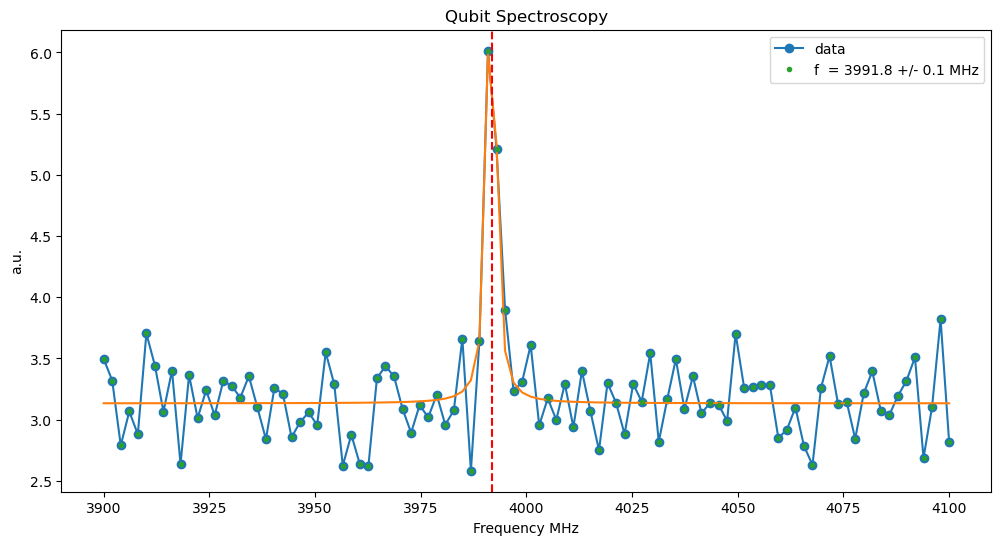

In [26]:
i = 0
data = global_data_path + r"\00001_qubit_spec_ge_Q7_2025-04-23.h5"
print('data path:', data)

SS = 'False' # did we do SingleShot for ge normalization?
ef = False # is this an ef experiment (is our single shot checking for ef?)
with SlabFile(data, 'r') as f:
    freqs = array(f['fpts'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == 'True':
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
        if ef == True:
            If = array(f['I_f'])[0]
            Qf = array(f['Q_f'])[0]

pp.pprint(config)

if SS == 'True':
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e - g) / abs(e - g)**2)
    if ef == True:
        f = np.mean((If+1j*Qf))
        pop_norm = abs(((I+1j*Q) - e)*(f - e) / abs(f - e)**2)
    ydata = pop_norm
else:
    ydata = amps

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(freqs, ydata, marker='o', label = 'data')
if SS == 'True':
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel("Qubit Frequency (MHz)")
plt.title('Qubit Spectroscopy')
plt.legend()

fit = Fit()
fit_results = fit.transmission_resonator_spectroscopy(freqs, ydata, plot=True)
plt.axvline(fit_results['f'][0], marker='', c='red', linestyle='--')
# plt.plot(freqs,I)
# plt.plot(freqs,Q)
pp.pprint(fit_results)
# plt.axvline(4015)
plt.show()


#### mux

data path: M:/malab/_Data/PUR1D4/20250410 - cooldown 6/20250422 - Santi - RFSoC tprocv2 - char4-5GHz\setup\00006_qubit_spec_ge_Q0_2025-04-23.h5
{'flux_freq': 0,
 'flux_gain': 0,
 'flux_length': 0,
 'mixer_freq': 4500,
 'mux_ch': 4,
 'mux_ro_chs': [2, 3, 4, 5, 6, 7, 8, 9],
 'nqz_qubit': 1,
 'nqz_res': 2,
 'py_avg': 5,
 'qubit_ch': 9,
 'qubit_ch_ef': 0,
 'qubit_freq_ef': 0,
 'qubit_gain_ef': 0,
 'qubit_gain_ge': 0.3,
 'qubit_length_ef': 25.0,
 'qubit_length_ge': 20,
 'qubit_phase': 0,
 'relax_delay': 5,
 'reps': 100,
 'res_ch': 1,
 'res_freq_ef': 0,
 'res_freq_ge': 6245.16937007904,
 'res_gain_ef': 0,
 'res_gain_ge': 0.001,
 'res_length_ef': 3,
 'res_length_ge': 3,
 'res_phase': 0,
 'ro_ch': 0,
 'ro_length': 3,
 'sigma_ef': 0,
 'sigma_ge': 0.3,
 'start': 3980,
 'steps': 100,
 'stop': 4080,
 't1': 0,
 't2': 0,
 'threshold': 0,
 'trig_time': 0.5}

 data path: M:/malab/_Data/PUR1D4/20250410 - cooldown 6/20250422 - Santi - RFSoC tprocv2 - char4-5GHz\setup\00006_qubit_spec_ge_Q0_2025-04-23.h5

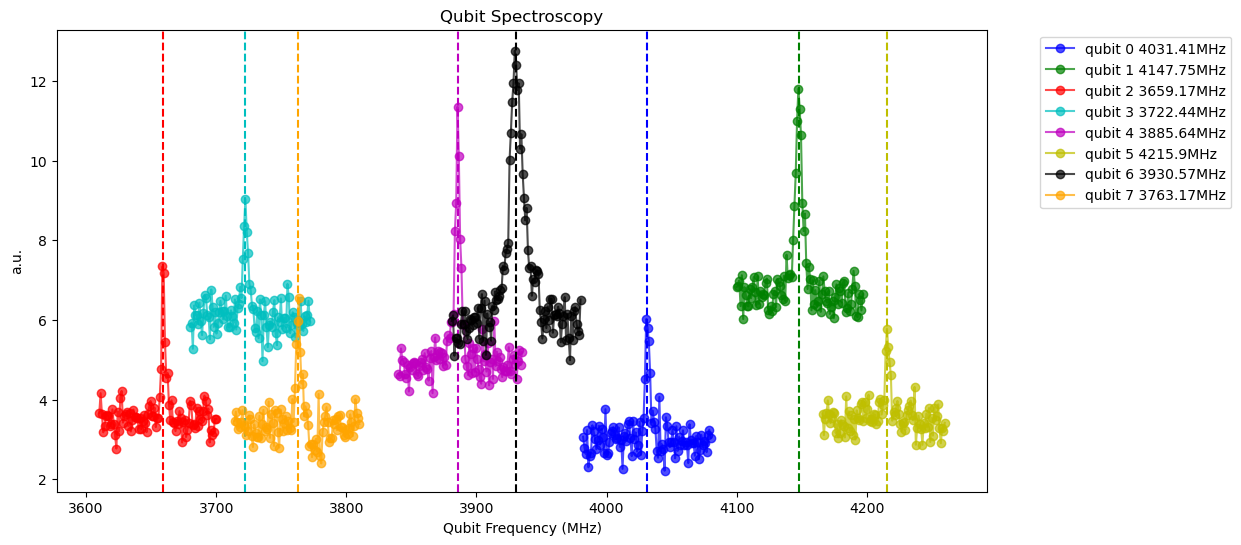

[4031.41383962803, 4147.752692248253, 3659.170329369172, 3722.4363156319923, 3885.6362992057543, 4215.904308334592, 3930.5676844247905, 3763.174413333846]


In [34]:
qubit_freqs = []
plt.figure(figsize=(12,6))
MUX = False
for qubit in range(8):
    data = global_data_path + r"\00006_qubit_spec_ge_Q" + str(qubit) + "_2025-04-23.h5"
    # data = r"M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250220 - fullchipchar - flux\setup" + r"\00000_qubit_spec_ge_mux_Q" + str(qubit) + "_2025-02-20.h5"
    print('data path:', data)

    SS = 'False' # did we do SingleShot for ge normalization?
    ef = False # is this an ef experiment (is our single shot checking for ef?)
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)

        if SS == 'True':
            Ig = array(f['I_g'])[0]
            Qg = array(f['Q_g'])[0]
            Ie = array(f['I_e'])[0]
            Qe = array(f['Q_e'])[0]
            if ef == True:
                If = array(f['I_f'])[0]
                Qf = array(f['Q_f'])[0]

    pp.pprint(config)

    if SS == 'True':
        # Normalize data
        e = np.mean((Ie+1j*Qe))
        g = np.mean((Ig+1j*Qg))
        ### Normalization ###
        pop_norm = abs(((I+1j*Q) - g)*(e - g) / abs(e - g)**2)
        if ef == True:
            f = np.mean((If+1j*Qf))
            pop_norm = abs(((I+1j*Q) - e)*(f - e) / abs(f - e)**2)
        ydata = pop_norm
    else:
        ydata = amps

    print('\n data path:', data)

    # plt.plot(freqs, I, marker='o', label = 'qubit ' + str(qubit))
    # plt.plot(freqs, Q, marker='o', label = 'qubit ' + str(qubit))

    if SS == 'True':
        plt.ylabel("Qubit Population")
    else:
        plt.ylabel("a.u.")
    plt.xlabel("Qubit Frequency (MHz)")
    plt.title('Qubit Spectroscopy')
    # plt.legend(loc = 'upper right')

    if MUX:
        ydata = ydata.T[0]

    fit = Fit()
    fit_results = fit.transmission_resonator_spectroscopy(freqs, ydata, plot=False)
    plt.axvline(fit_results['f'][0], marker='', c=colors[qubit], linestyle='--')
    # plt.plot(freqs,I)
    # plt.plot(freqs,Q)
    qubit_freqs.append(fit_results['f'][0])
    # pp.pprint(fit_results)
    # plot only data within +- 100MHz of the fitted frequency
    # Create a boolean mask
    mask = (freqs >= fit_results['f'][0]-50) & (freqs <= fit_results['f'][0]+50)

    plt.plot(freqs[mask], ydata[mask], marker='o', label = 'qubit ' + str(qubit) + ' ' + str(round(fit_results['f'][0],2)) + 'MHz', alpha=0.7, c = colors[qubit])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xlim([3600, 3700])
plt.show()
print(qubit_freqs)



Text(0.5, 1.0, 'Temp vs time')

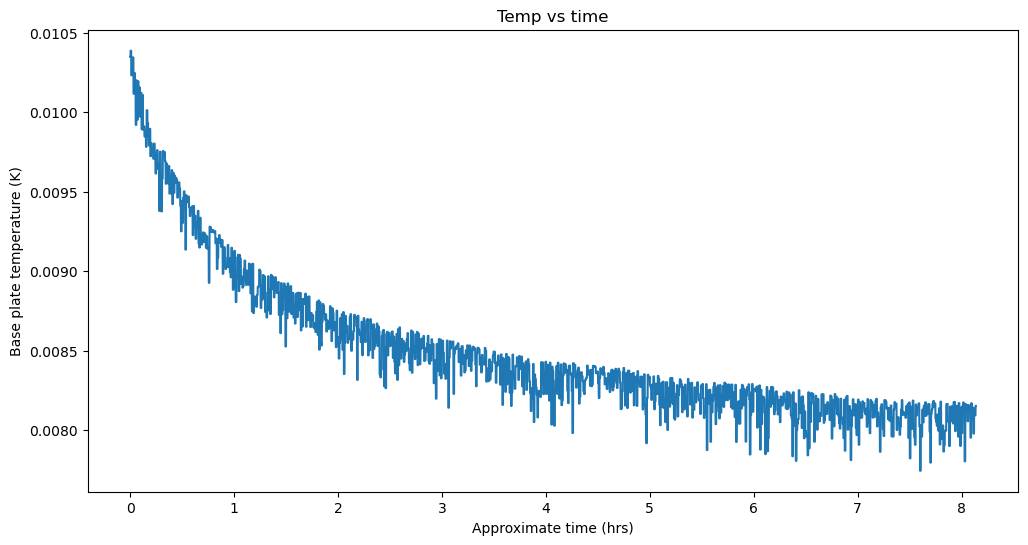

In [ ]:
data_array = []

# Open the file and read line by line
with open("20250211 - fridge_temp.txt", "r") as file:
    for line in file:
        parts = line.strip().split(",")  # Split by commas
        if len(parts) == 3:  # Ensure correct format
            date, time, value = parts
            data_array.append([date, time, value])  # Convert value to float

data_array = np.array(data_array).T

temp_array = np.zeros(len(data_array[2]))
for i in range(len(data_array[2])):
    temp_array[i] = float(data_array[2][i])

# Print the extracted data
time_axis = np.linspace(0, approx_tot_time, len(data_array[1]))
plt.figure(figsize=(12,6))
plt.plot(time_axis, temp_array)
plt.xlabel('Approximate time (hrs)')
plt.ylabel('Base plate temperature (K)')
plt.title('Temp vs time')

### Length Rabi


 data path: M:/malab\People\Santi\data\LL8_qubit\FLB8\00001_time_rabi_ge_Q3_2024-11-03.h5
[1.243797278429286, 6.0, 90.0, 0.98, 2.3304283837186146]
array([  1.26510145,   3.45179655, 270.91369758,  13.72559403,
         2.32105147])
Peak: 0.14485210586870031


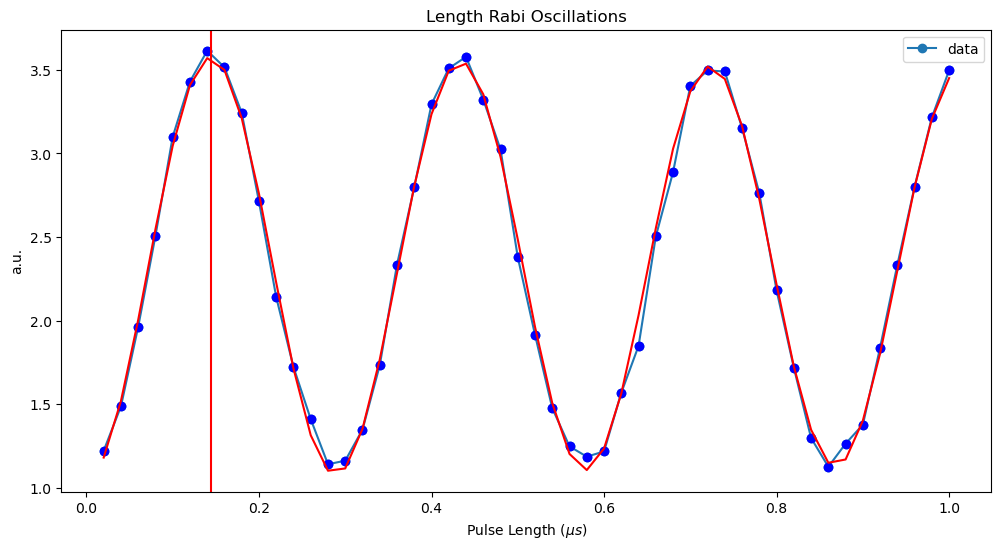

In [ ]:
# data = global_data_path + r"\00001_time_rabi_ge_Q3_2024-11-03.h5"
# data = r"M:/malab\People\Santi\data\candle_qubit\00000_time_rabi_ef_Q0_2024-10-12.h5"

SS = False # did we do SingleShot for ge normalization?
ef = False # is this an ef experiment (is our single shot checking for ef?)
with SlabFile(data, 'r') as f:
    lengths = array(f['lengths'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == 'True':
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
        if ef == True:
            If = array(f['I_f'])[0]
            Qf = array(f['Q_f'])[0]
# pp.pprint(config)

if SS == 'True':
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e - g) / abs(e - g)**2)
    if ef == True:
        f = np.mean((If+1j*Qf))
        pop_norm = abs(((I+1j*Q) - e)*(f - e) / abs(f - e)**2)
    ydata = pop_norm
else:
    ydata = amps

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(lengths, ydata,marker='o', label='data')
if SS == 'True':
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Pulse Length ($\mu s$)")
plt.title(r'Length Rabi Oscillations')
plt.legend()

fit = Fit()
# fit_results = fit.rabi(gains, ydata, plot=True)
# pp.pprint(fit_results)
# peak = 0.5 / fit_results['f'][0] - (fit_results['phase'][0]/(180*fit_results['f'][0]))
# print('Peak:', peak)
# plt.axvline(peak, marker='', c='red')

fit_results = fitdecaysin(lengths, ydata, showfit=True)
pp.pprint(fit_results)
peak = 0.5 / fit_results[1]
print('Peak:', peak)
plt.axvline(peak, marker='', c='red')

### Amplitude Rabi

Some sort of issue with the e and g collection for this expeirment. Works fine for Ramsey, but for this rabi experimnet the mean g and mean e are basically equal...


 data path: M:\malab\_Data\PUR1D4\20250315 - cooldown 5\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\20250325 - q0q1 crossing\collective decay 1\00002_power_rabi_ge_Q0_2025-03-28.h5
{'T': [2100450.543677346, 1046781377477.6871],
 'amp': [0.3838601304213016, 0.024846027829892696],
 'f': [9.982795795810484, 0.11258977648996464],
 'fit_func': <function Fit.rabi.<locals>.<lambda> at 0x000001C9A869D8A0>,
 'offset': [3.948095472728049, 0.013807449795552096],
 'phase': [3.109200242424496, 0.06108438447564201]}
Peak: 0.05008616926831628
[0.34789299442483035, 16.548484848484847, 90.0, 0.2991210401025453, 4.138997983403027]
Peak: 0.05005545512951717


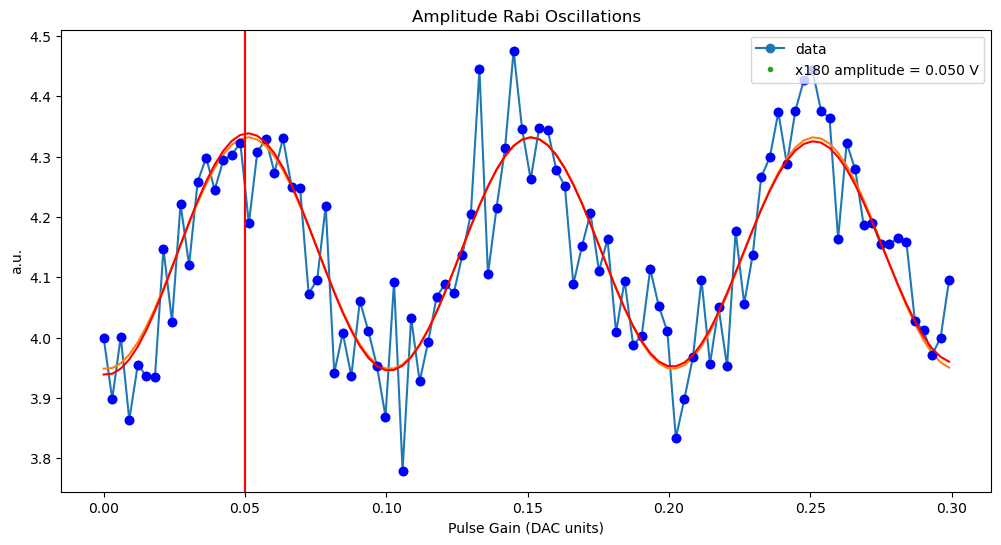

In [9]:
qubit = 6
# data = global_data_path + r"\00000_power_rabi_ge_mux_Q" + str(qubit) + "_2025-03-25.h5"
# data = r"M:/malab\People\Santi\data\candle_qubit\00000_power_rabi_ef_Q4_2024-10-25.h5"
data = r"M:\malab\_Data\PUR1D4\20250315 - cooldown 5\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\20250325 - q0q1 crossing\collective decay 1\00002_power_rabi_ge_Q0_2025-03-28.h5"
# data = r"M:\malab\_Data\PUR1D4\20250315 - cooldown 5\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\20250325 - q0q1 crossing\00000_power_rabi_ge_Q0_2025-03-28.h5"

MUX = False
SS = 'False' # did we do SingleShot for ge normalization?
ef = False # is this an ef experiment (is our single shot checking for ef?)
with SlabFile(data, 'r') as f:
    gains = array(f['gains'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == 'True':
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
        if ef == True:
            If = array(f['I_f'])[0]
            Qf = array(f['Q_f'])[0]
# pp.pprint(config)

if SS == 'True':
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e - g) / abs(e - g)**2)
    if ef == True:
        f = np.mean((If+1j*Qf))
        pop_norm = abs(((I+1j*Q) - e)*(f - e) / abs(f - e)**2)
    ydata = pop_norm
else:
    ydata = amps

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(gains, ydata,marker='o', label='data')
if SS == 'True':
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Pulse Gain (DAC units)")
plt.title(r'Amplitude Rabi Oscillations')
plt.legend()

cor = 0.00

fit = Fit()
if MUX:
    ydata = ydata.T[0]

fit_results = fit.rabi(gains, ydata, plot=True)

pp.pprint(fit_results)
peak = 0.5 / fit_results['f'][0] #- (fit_results['phase'][0]/(180*fit_results['f'][0]))
# peak = fit_results['T'][0]
print('Peak:', peak + cor)
plt.axvline(peak + cor, marker='', c='red')

# plt.plot(gains, I,marker='o', label='I')
# plt.plot(gains, Q,marker='o', label='Q')

# plt.legend()
fit_results = fitdecaysin(gains, ydata, showfit=True)
# pp.pprint(fit_results)
peak = 0.5 / fit_results[1]
print('Peak:', peak + cor)
plt.axvline(peak + cor, marker='', c='red')
# plt.axvline(0.45, marker='', c='red')
plt.show()


### T2 Ramsey

data path: M:\malab\_Data\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\20250324 - initial characterization\00001_Ramsey_ge_mux_Q7_2025-03-25.h5
{'flux_freq': 0,
 'flux_gain': 0,
 'flux_length': 0,
 'mixer_freq': 6000,
 'mux_ch': 4,
 'mux_ro_chs': [2, 3, 4, 5, 6, 7, 8, 9],
 'nqz_qubit': 1,
 'nqz_res': 2,
 'py_avg': 10,
 'qubit_ch': 0,
 'qubit_ch_ef': 0,
 'qubit_freq_ef': 0,
 'qubit_freq_ge': 3836.207382471576,
 'qubit_gain_ef': 0,
 'qubit_gain_ge': 0.3146862534793845,
 'qubit_length_ef': 25.0,
 'qubit_length_ge': 100,
 'qubit_phase': 0,
 'ramsey_freq': 1.5,
 'relax_delay': 200,
 'reps': 200,
 'res_ch': 1,
 'res_freq_ef': [0, 0, 0, 0, 0, 0, 0, 0],
 'res_freq_ge': [6245.461455192565,
                 6169.890609588622,
                 6303.297471122742,
                 6201.473188705443,
                 6125.617677688599,
                 6224.960059585572,
                 6149.008061256408,
                 6272.84604473114],
 'res_gain_ef': [0, 0, 0, 0, 0, 0, 0, 0],
 'res_gain_g

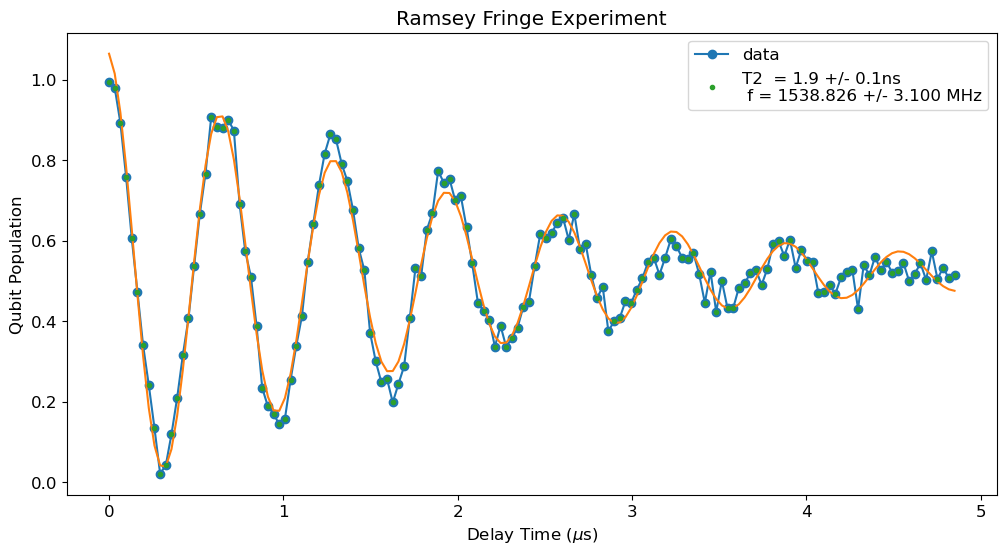

In [162]:
data = global_data_path + r"\00001_Ramsey_ge_mux_Q7_2025-03-25.h5"
# data = r"M:/malab\People\Santi\data\candle_qubit\00003_Ramsey_ef_Q1_2024-10-25.h5"

print('data path:', data)

MUX = True
SS = 'True'
ef = False # is this an ef experiment (is our single shot checking for ef?)
with SlabFile(data, 'r') as f:
    delay_times = array(f['delay_times'])[0]
    delay_times -= delay_times[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == 'True':
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
        if ef == True:
            If = array(f['I_f'])[0]
            Qf = array(f['Q_f'])[0]
pp.pprint(config)

if SS == 'True':
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e- g) / abs(e - g)**2)
    if ef == True:
        f = np.mean((If+1j*Qf))
        pop_norm = abs(((I+1j*Q) - e)*(f- e) / abs(f - e)**2)
    ydata = pop_norm
else:
    ydata = amps

if MUX:
    ydata = ydata.T[0]

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(delay_times, ydata,marker='o', label='data')
if SS == 'True':
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Delay Time ($\mu$s)")
plt.title(r'Ramsey Fringe Experiment')
plt.legend()

fit = Fit()
fit_results = fit.ramsey(delay_times, ydata, plot=True)
pp.pprint(fit_results)


### T2 Spin Echo

{'mixer_freq': 7000,
 'mux_ch': 4,
 'mux_ro_chs': [2, 3, 4, 5, 6, 7],
 'nqz_qubit': 1,
 'nqz_res': 2,
 'py_avg': 10,
 'qubit_ch': 0,
 'qubit_ch_ef': 0,
 'qubit_freq_ef': 3120.384,
 'qubit_freq_ge': 4219.63735,
 'qubit_gain_ef': 0.03,
 'qubit_gain_ge': 0.2397,
 'qubit_length_ef': 25.0,
 'qubit_length_ge': 25.0,
 'qubit_phase': 0,
 'ramsey_freq': 2,
 'relax_delay': 500,
 'reps': 100,
 'res_ch': 1,
 'res_freq_ef': 7228.515,
 'res_freq_ge': 6204.35,
 'res_gain_ef': 0.05,
 'res_gain_ge': 0.05,
 'res_length': 6.0,
 'res_phase': 0,
 'ro_ch': 0,
 'ro_length': 6.0,
 'sigma': 0.04,
 'sigma_ef': 0,
 'start': 0.0,
 'steps': 150,
 'stop': 8,
 'threshold': 0,
 'trig_time': 0.5}

 data path: M:/malab\People\Santi\data\LL8_qubit\FLB8\00001_SpinEcho_ge_Q3_2024-11-03.h5
{'T2': [2.653239096369416, 0.10629484423389117],
 'amp': [1.1825230090427667, 0.03736445500364534],
 'f': [2.0995207783104326, 0.0024720527598630524],
 'final_offset': [0.5327326545257892, 0.004666718679823463],
 'fit_func': <function Fi

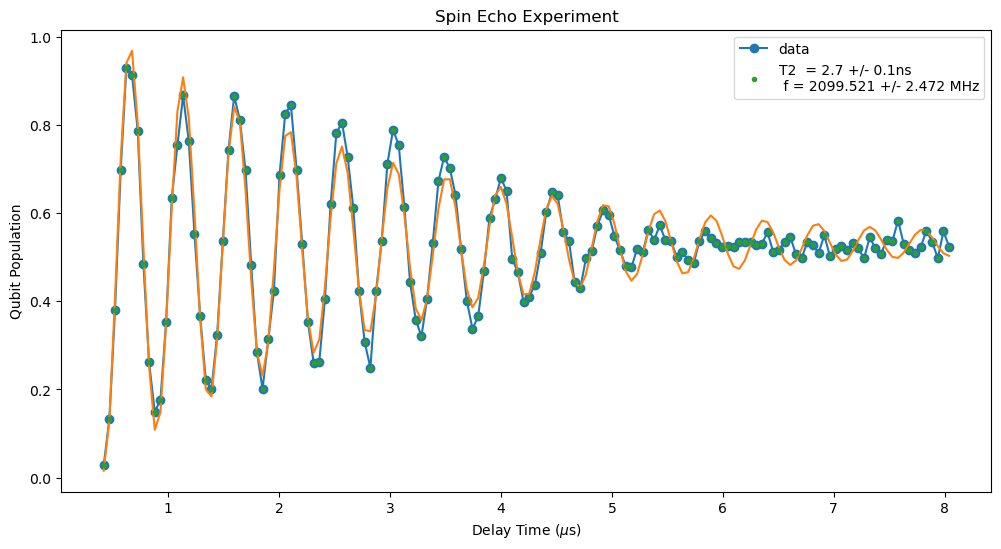

In [ ]:
data = global_data_path + r"\00001_SpinEcho_ge_Q3_2024-11-03.h5"
SS = True
with SlabFile(data, 'r') as f:
    delay_times1 = array(f['delay_times1'])[0]
    delay_times2 = array(f['delay_times2'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == 'True':
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
pp.pprint(config)

if SS == 'True':
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e- g) / abs(e - g)**2)
    ydata = pop_norm
else:
    ydata = amps

delay_times = delay_times1 + delay_times2

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(delay_times, ydata,marker='o', label='data')
if SS == 'True':
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Delay Time ($\mu$s)")
plt.title(r'Spin Echo Experiment')
plt.legend()

fit = Fit()
fit_results = fit.ramsey(delay_times, ydata, plot=True)
pp.pprint(fit_results)


### T1

M:\malab\_Data\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\20250324 - initial characterization\00000_T1_ge_mux_Q7_2025-03-25.h5
{'flux_freq': 0,
 'flux_gain': 0,
 'flux_length': 0,
 'mixer_freq': 6000,
 'mux_ch': 4,
 'mux_ro_chs': [2, 3, 4, 5, 6, 7, 8, 9],
 'nqz_qubit': 1,
 'nqz_res': 2,
 'py_avg': 10,
 'qubit_ch': 0,
 'qubit_ch_ef': 0,
 'qubit_freq_ef': 0,
 'qubit_freq_ge': 3835.707382471576,
 'qubit_gain_ef': 0,
 'qubit_gain_ge': 0.3146862534793845,
 'qubit_length_ef': 25.0,
 'qubit_length_ge': 100,
 'qubit_phase': 0,
 'relax_delay': 300,
 'reps': 300,
 'res_ch': 1,
 'res_freq_ef': [0, 0, 0, 0, 0, 0, 0, 0],
 'res_freq_ge': [6245.461455192565,
                 6169.890609588622,
                 6303.297471122742,
                 6201.473188705443,
                 6125.617677688599,
                 6224.960059585572,
                 6149.008061256408,
                 6272.84604473114],
 'res_gain_ef': [0, 0, 0, 0, 0, 0, 0, 0],
 'res_gain_ge': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0

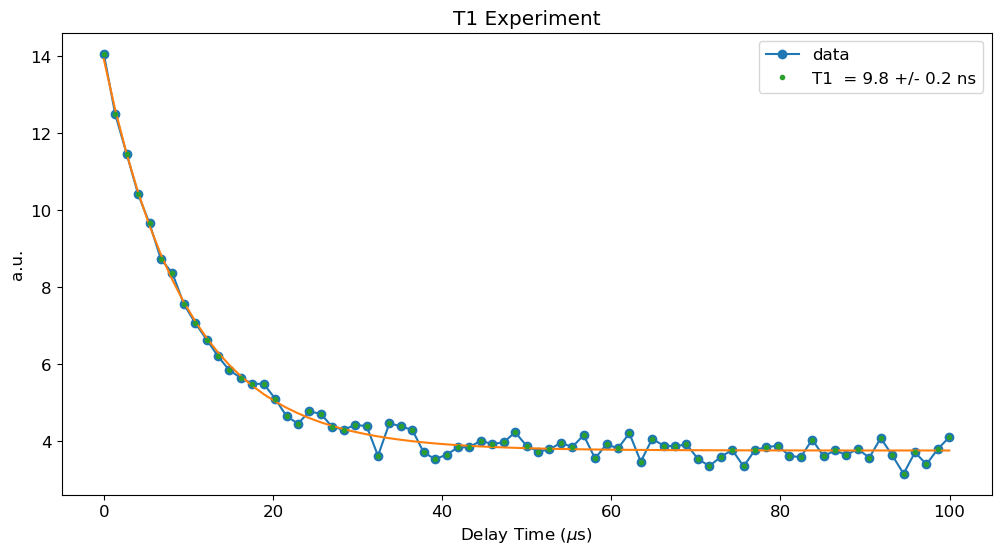

In [142]:
data_path = global_data_path + r"\00000_T1_ge_mux_Q7_2025-03-25.h5"
print(data_path)
SS = 'False'
MUX = True
with SlabFile(data_path, 'r') as f:
    delay_times = array(f['delay_times'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)
    if SS == 'True':
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
pp.pprint(config)


if SS == 'True':
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e- g) / abs(e - g)**2)
    ydata = pop_norm
else:
    ydata = amps

if MUX:
    ydata = ydata.T[0]

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(delay_times, ydata, marker='o', label='data')
if SS == 'True':
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Delay Time ($\mu$s)")
plt.title(r'T1 Experiment')
plt.legend()

fit = Fit()
fit_results = fit.T1(delay_times, ydata, plot=True)
pp.pprint(fit_results)


### MUX T1

M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250218 - fullchipchar\00001_T1_mux_ge_2025-02-19.h5
{'flux_freq': 0,
 'flux_gain': 0,
 'flux_length': 0,
 'mixer_freq': 6000,
 'mux_ch': 4,
 'mux_ro_chs': [2, 3, 4, 5, 6, 7, 8, 9],
 'nqz_qubit': 1,
 'nqz_res': 2,
 'py_avg': 10,
 'qubit_ch': 0,
 'qubit_ch_ef': 0,
 'qubit_freq_ef': [0, 0, 0, 0, 0, 0, 0, 0],
 'qubit_freq_ge': [4163.145871431656,
                   4278.230775477831,
                   3894.3688328564695,
                   3600.116213086959,
                   3649.2483251474123,
                   3806.701763366524,
                   3898.479255668981,
                   3748.243752960932],
 'qubit_gain_ef': [0, 0, 0, 0, 0, 0, 0, 0],
 'qubit_gain_ge': [0.48411119272491715,
                   0.29820516645287776,
                   0.56,
                   0.7721562192846452,
                   0.4061558328581836,
                   1.0,
                   0.5,
                   0.49142754830179436],
 'qu

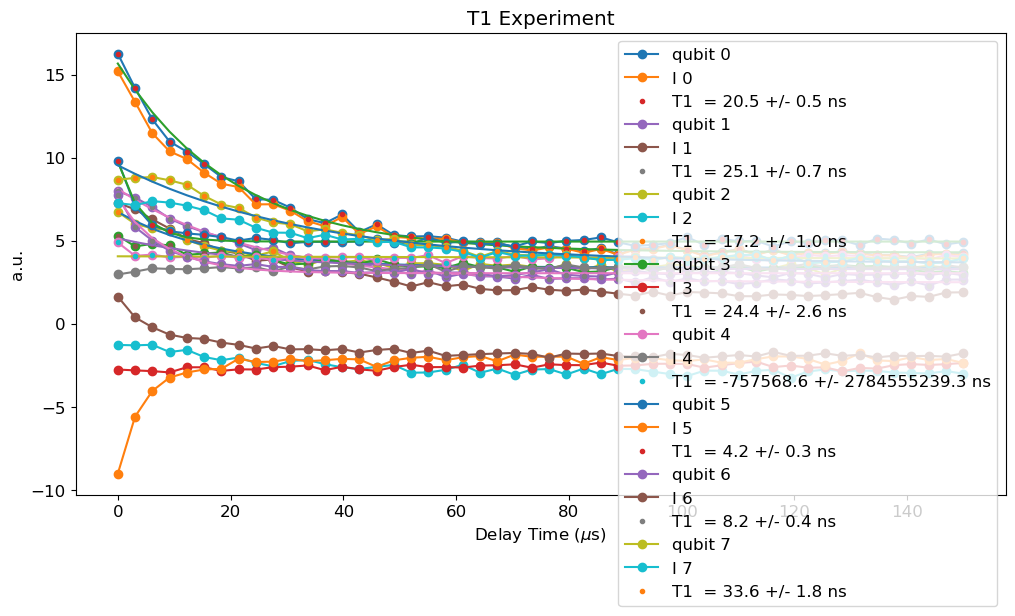

In [ ]:
data_path = global_data_path + r"\00000_T1_mux_ge_2025-03-25.h5"
print(data_path)
SS = 'True'
with SlabFile(data_path, 'r') as f:
    delay_times = array(f['delay_times'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)
    if SS == 'True':
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
pp.pprint(config)


if SS == 'True':
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e- g) / abs(e - g)**2)
    ydata = pop_norm
else:
    ydata = amps

print('\n data path:', data)

plt.figure(figsize=(12,6))
for qubit in range(num_res):
    plt.plot(delay_times, ydata[qubit], marker='o', label='qubit ' + str(qubit))
    plt.plot(delay_times, I[qubit][0].T[0], marker='o', label='I ' + str(qubit))
    fit = Fit()
    fit_results = fit.T1(delay_times, ydata[qubit].T[0], plot=True)
    pp.pprint(fit_results)
# plt.plot(delay_times, ydata, marker='o', label='data')
if SS == 'True':
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Delay Time ($\mu$s)")
plt.title(r'T1 Experiment')
plt.legend()

# fit = Fit()
# fit_results = fit.T1(delay_times, ydata, plot=True)
# pp.pprint(fit_results)


### Single Shot Experiment

{'SS_ONLY': 'True',
 'flux_freq': 0,
 'flux_gain': 0,
 'flux_length': 0,
 'mixer_freq': 6000,
 'mux_ch': 4,
 'mux_ro_chs': [2, 3, 4, 5, 6, 7, 8, 9],
 'nqz_qubit': 1,
 'nqz_res': 2,
 'py_avg': 1,
 'qubit_ch': 0,
 'qubit_ch_ef': 0,
 'qubit_freq_ef': 0,
 'qubit_freq_ge': 4190.227863203365,
 'qubit_gain_ef': 0,
 'qubit_gain_ge': 0.41538919323367784,
 'qubit_length_ef': 25.0,
 'qubit_length_ge': 100,
 'qubit_phase': 0,
 'relax_delay': 300,
 'reps': 1,
 'res_ch': 1,
 'res_freq_ef': 0,
 'res_freq_ge': 6169.999516389713,
 'res_gain_ef': 0,
 'res_gain_ge': 0.003,
 'res_length_ef': 3,
 'res_length_ge': 3,
 'res_phase': 0,
 'ro_ch': 0,
 'ro_length': 3,
 'sigma_ef': 0,
 'sigma_ge': 0.05,
 'steps': 10000,
 't1': 0,
 't2': 0,
 'threshold': 0,
 'trig_time': 0.5}

 data path: M:\malab\_Data\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\20250324 - initial characterization\00000_IQ_plot_Q1_2025-03-25.h5


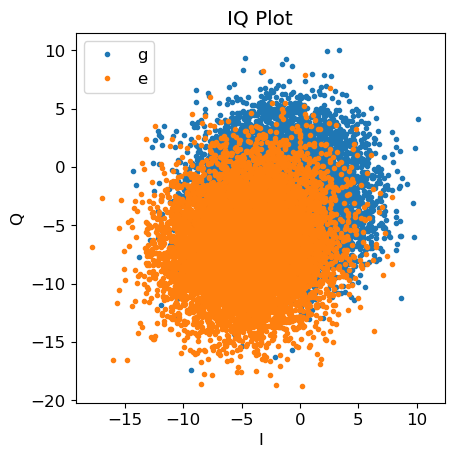

Optimal fidelity after rotation = 0.533


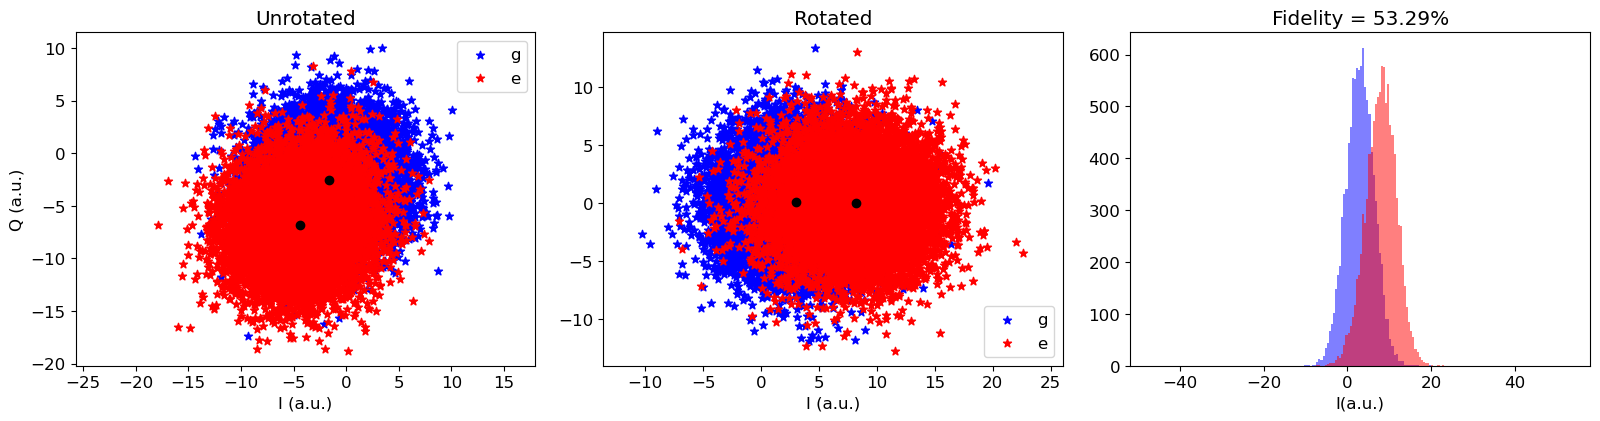

In [229]:
# data = global_data_path + r"\00001_IQ_plot_mux_Q7_2025-03-25.h5"
data = global_data_path + r"\00000_IQ_plot_Q1_2025-03-25.h5"

MUX = True
ef = False
with SlabFile(data, 'r') as f:
    I_g = array(f['I_g'])[0]
    Q_g = array(f['Q_g'])[0]
    I_e = array(f['I_e'])[0]
    Q_e = array(f['Q_e'])[0]
    if ef == True:
        I_f = array(f['I_f'])[0]
        Q_f = array(f['Q_f'])[0]
    config = f.attrs['config']
    config = json.loads(config)

pp.pprint(config)

print('\n data path:', data)

plt.title('IQ Plot')
plt.plot(I_g, Q_g, '.',label = 'g')
plt.plot(I_e, Q_e, '.',label = 'e')
if ef == True:
    plt.plot(I_f, Q_f, '.',label = 'f')
plt.xlabel('I')
plt.ylabel('Q')
plt.legend()
plt.axis('square')
plt.show()

fid, threshold, angle = hist(data=[I_g, Q_g, I_e, Q_e],  plot=True, ran=50)
print('Optimal fidelity after rotation = %.3f' % fid)

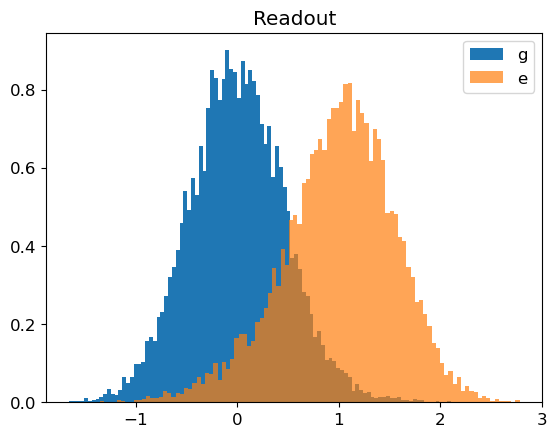

max fidelity =  0.6977
sigma_g = 0.47032889254402005
sigma_e = 0.5492806053984949


In [227]:
vec_I = np.mean(I_e) - np.mean(I_g)
vec_Q = np.mean(Q_e) - np.mean(Q_g)
gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
estate = (I_e - np.mean(I_g))*vec_I + (Q_e - np.mean(Q_g))*vec_Q
gstate = gstate / abs(vec_I+1j*vec_Q)**2
estate = estate / abs(vec_I+1j*vec_Q)**2

bin_num = 100
n, binsg, patches = plt.hist(gstate, bins=bin_num, label='g', density=True)
n, binse, patches = plt.hist(estate, bins=bin_num, label='e', alpha=0.7, density=True)
plt.legend()
plt.title("Readout")
plt.show()
th_min = min(gstate)
th_max = max(estate)
th_list = np.linspace(th_min,th_max,1000)
fidelity = [(sum(gstate<th)+sum(estate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
print('max fidelity = ',max(fidelity)*2-1)
print('sigma_g =',np.std(gstate))
print('sigma_e =',np.std(estate))

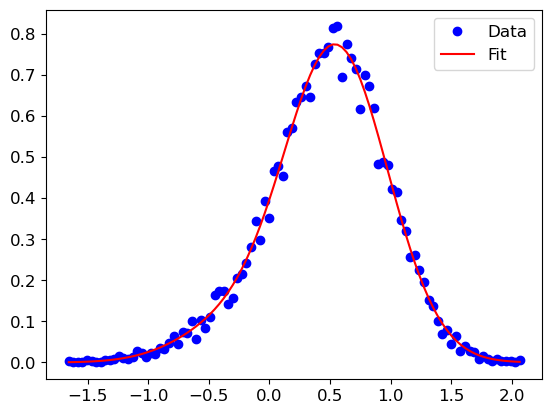

Amplitude 1: 0.082759964735505
Center 1: -0.3326639262080429
Sigma 1: 0.4288143252899368
Amplitude 2: 0.7644857191377482
Center 2: 0.5503487354709179
Sigma 2: 0.4295815164826824


In [228]:
# fitting to double gaussian to calculate temperature

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the double Gaussian function
def double_gaussian(x, amp1, cen1, sigma1, amp2, cen2, sigma2):
    return amp1 * np.exp(-(x - cen1)**2 / (2 * sigma1**2)) + amp2 * np.exp(-(x - cen2)**2 / (2 * sigma2**2))

# Initial guesses for the parameters
initial_guess = [150, -4, 5.23, 100, 5, 5.23]

# Fit the data to the double Gaussian function
popt, pcov = curve_fit(double_gaussian, binsg[:-1], n, p0=initial_guess)

# Extract the fitted parameters
amp1_fit, cen1_fit, sigma1_fit, amp2_fit, cen2_fit, sigma2_fit = popt

# Generate the fitted curve
y_fit = double_gaussian(binsg[:-1], *popt)

# Plot the data and the fitted curve
plt.plot(binsg[:-1], n, 'bo', label='Data')
plt.plot(binsg[:-1], y_fit, 'r-', label='Fit')
plt.legend()
plt.show()

# Print the fitted parameters
print("Amplitude 1:", amp1_fit)
print("Center 1:", cen1_fit)
print("Sigma 1:", sigma1_fit)
print("Amplitude 2:", amp2_fit)
print("Center 2:", cen2_fit)
print("Sigma 2:", sigma2_fit)



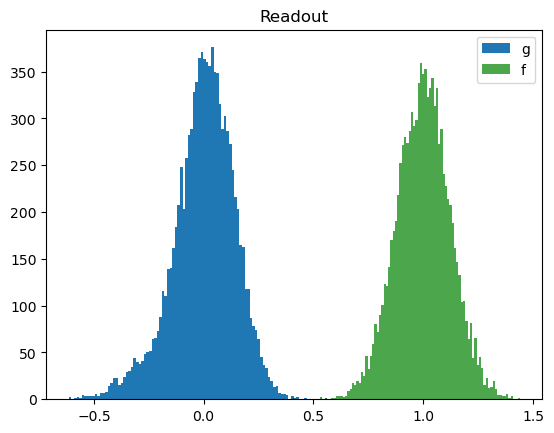

max fidelity =  0.9998
sigma_g = 0.14212860245524095
sigma_f = 0.12191980829147898


In [105]:
vec_I = np.mean(I_f) - np.mean(I_g)
vec_Q = np.mean(Q_f) - np.mean(Q_g)
gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
fstate = (I_f - np.mean(I_g))*vec_I + (Q_f - np.mean(Q_g))*vec_Q
gstate = gstate / abs(vec_I+1j*vec_Q)**2
fstate = fstate / abs(vec_I+1j*vec_Q)**2
plt.hist(gstate,bins = 100,label = 'g')
plt.hist(fstate,bins = 100,label = 'f',alpha=0.7, color='g')
plt.legend()
plt.title("Readout")
plt.show()
th_min = min(gstate)
th_max = max(fstate)
th_list = np.linspace(th_min,th_max,1000)
fidelity = [(sum(gstate<th)+sum(fstate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
print('max fidelity = ',max(fidelity)*2-1)
print('sigma_g =',np.std(gstate))
print('sigma_f =',np.std(fstate))

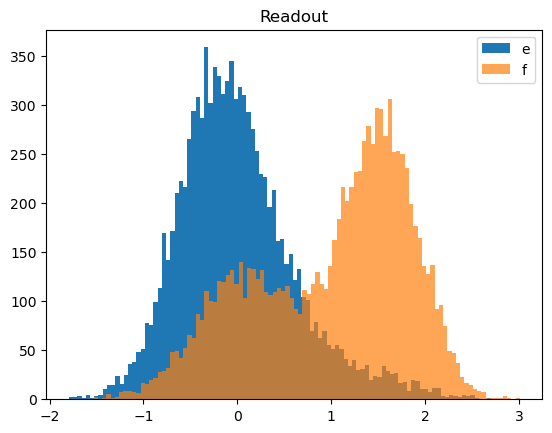

max fidelity =  0.5444
sigma_e = 0.6237502131468022
sigma_f = 0.8217842242107656


In [72]:
vec_I = np.mean(I_f) - np.mean(I_e)
vec_Q = np.mean(Q_f) - np.mean(Q_e)
estate = (I_e - np.mean(I_e))*vec_I + (Q_e - np.mean(Q_e))*vec_Q
fstate = (I_f - np.mean(I_e))*vec_I + (Q_f - np.mean(Q_e))*vec_Q
estate = estate / abs(vec_I+1j*vec_Q)**2
fstate = fstate / abs(vec_I+1j*vec_Q)**2
plt.hist(estate,bins = 100,label = 'e')
plt.hist(fstate,bins = 100,label = 'f',alpha=0.7)
plt.legend()
plt.title("Readout")
plt.show()
th_min = min(estate)
th_max = max(fstate)
th_list = np.linspace(th_min,th_max,1000)
fidelity = [(sum(estate<th)+sum(fstate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
print('max fidelity = ',max(fidelity)*2-1)
print('sigma_e =',np.std(estate))
print('sigma_f =',np.std(fstate))

### Optimize Readout


 data path: M:/malab\People\Santi\data\candle_qubit\00001_Readout_Optimization_gef_Q0_2024-11-01.h5


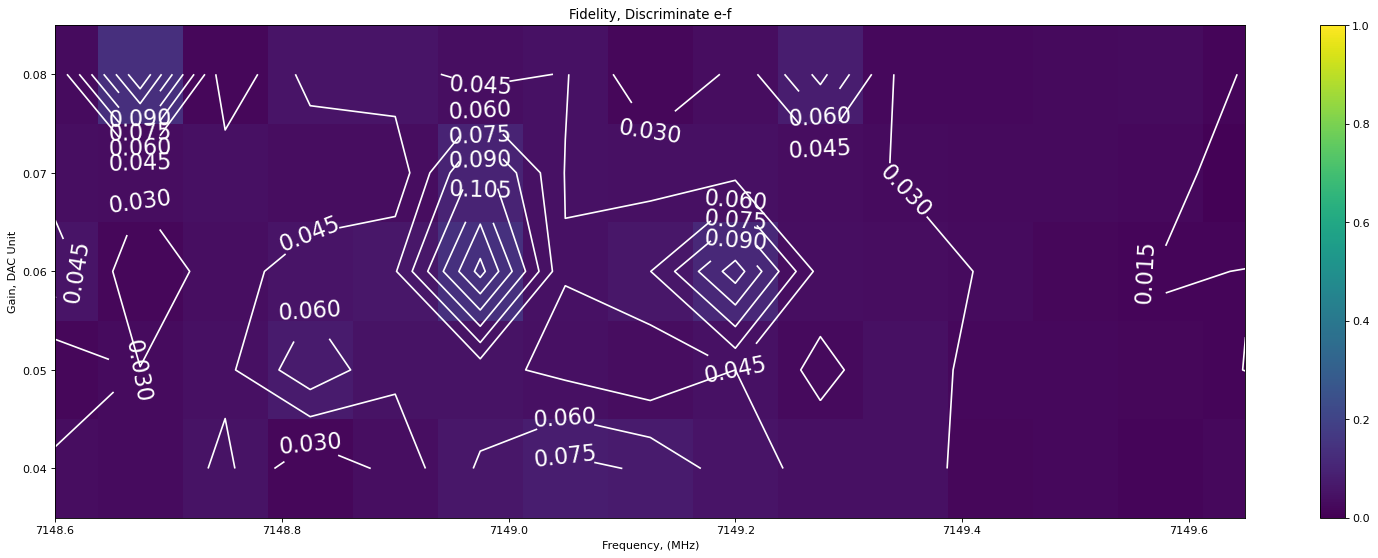

In [16]:
data = r"M:/malab\People\Santi\data\candle_qubit\00001_Readout_Optimization_gef_Q0_2024-11-01.h5"
# data = r"M:/malab\People\Santi\data\candle_qubit\00000_Readout_Optimization_gef_Q0_2024-10-31.h5"

ge = False
gf = False
ef = True

with SlabFile(data, 'r') as f:
    # freqs_list =  array(f['freqs_list'])[0]
    # gains_list = array(f['gains_list'])[0]
    I_g_array = array(f['I_g_array'])[0]
    Q_g_array = array(f['Q_g_array'])[0]
    I_e_array = array(f['I_e_array'])[0]
    Q_e_array = array(f['Q_e_array'])[0]
    if ef == True or gf == True:
        I_f_array = array(f['I_f_array'])[0]
        Q_f_array = array(f['Q_f_array'])[0]
    # I_g_array = array(f['I_g'])[0]
    # Q_g_array = array(f['Q_g'])[0]
    # I_e_array = array(f['I_e'])[0]
    # Q_e_array = array(f['Q_e'])[0]
    config = f.attrs['config']
    config = json.loads(config)

# print(config)
freq_start = config['freq_start']
freq_steps = config['freq_steps']
freq_step_size = config['freq_step_size']
gain_start = config['gain_start']
gain_steps = config['gain_steps']
gain_step_size = config['gain_step_size']

freqs_list = np.zeros(freq_steps)
gains_list = np.zeros(gain_steps)
for gain in range(gain_steps):
    gains_list[gain] = gain_start + gain_step_size*gain
for freq in range(freq_steps):
    freqs_list[freq] = freq_start + freq_step_size*freq

fid_Array =np.zeros((gain_steps, freq_steps))
for index_freq in range(freq_steps):
    for index_amp in range(gain_steps):
        if ge == True:
            I_g = I_g_array[index_freq][0][index_amp][0]
            Q_g = Q_g_array[index_freq][0][index_amp][0]
            I_e = I_e_array[index_freq][0][index_amp][0]
            Q_e = Q_e_array[index_freq][0][index_amp][0]
            vec_I = np.mean(I_e) - np.mean(I_g)
            vec_Q = np.mean(Q_e) - np.mean(Q_g)
            gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
            estate = (I_e - np.mean(I_g))*vec_I + (Q_e - np.mean(Q_g))*vec_Q
            gstate = gstate / abs(vec_I+1j*vec_Q)**2
            estate = estate / abs(vec_I+1j*vec_Q)**2

            th_min = min(gstate)
            th_max = max(estate)
            th_list = np.linspace(th_min,th_max,1000)
            fidelity = [(sum(gstate<th)+sum(estate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]

        elif gf == True:
            I_g = I_g_array[index_freq][0][index_amp][0]
            Q_g = Q_g_array[index_freq][0][index_amp][0]
            I_f = I_f_array[index_freq][0][index_amp][0]
            Q_f = Q_f_array[index_freq][0][index_amp][0]
            vec_I = np.mean(I_f) - np.mean(I_g)
            vec_Q = np.mean(Q_f) - np.mean(Q_g)
            gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
            fstate = (I_f - np.mean(I_g))*vec_I + (Q_f - np.mean(Q_g))*vec_Q
            gstate = gstate / abs(vec_I+1j*vec_Q)**2
            fstate = fstate / abs(vec_I+1j*vec_Q)**2

            th_min = min(gstate)
            th_max = max(fstate)
            th_list = np.linspace(th_min,th_max,1000)
            fidelity = [(sum(gstate<th)+sum(fstate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]

        elif ef == True:
            I_e = I_e_array[index_freq][0][index_amp][0]
            Q_e = Q_e_array[index_freq][0][index_amp][0]
            I_f = I_f_array[index_freq][0][index_amp][0]
            Q_f = Q_f_array[index_freq][0][index_amp][0]
            vec_I = np.mean(I_f) - np.mean(I_e)
            vec_Q = np.mean(Q_f) - np.mean(Q_e)
            estate = (I_e - np.mean(I_e))*vec_I + (Q_e - np.mean(Q_e))*vec_Q
            fstate = (I_f - np.mean(I_e))*vec_I + (Q_f - np.mean(Q_e))*vec_Q
            estate = estate / abs(vec_I+1j*vec_Q)**2
            fstate = fstate / abs(vec_I+1j*vec_Q)**2

            th_min = min(estate)
            th_max = max(fstate)
            th_list = np.linspace(th_min,th_max,1000)
            fidelity = [(sum(estate<th)+sum(fstate>th))/np.shape(estate)[0]/2 for i,th in enumerate(th_list)]
            
        fid_Array[index_amp, index_freq] = max(fidelity)*2-1

print('\n data path:', data)


plt.figure(figsize=(24, 8), dpi=80)
normalize = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)
figA = plt.pcolormesh(freqs_list, gains_list, fid_Array,  norm=normalize)
figB = plt.contour(freqs_list, gains_list, fid_Array, 10 ,colors='w')
plt.clabel(figB, figB.levels, inline=True, fontsize=20)
plt.ylabel(r"Gain, DAC Unit")
plt.xlabel(r"Frequency, (MHz)")
if ge == True:
    plt.title(r"Fidelity, Discriminate g-e")
elif gf == True:
    plt.title(r"Fidelity, Discriminate g-f")
elif ef == True:
    plt.title(r"Fidelity, Discriminate e-f")

plt.colorbar(figA)
plt.show()
#plt.savefig("FidwithoutJPA.png",dpi=300,bbox_inches='tight')

In [111]:
index_amp_0, index_freq_0 = np.where(fid_Array==np.max(fid_Array))
print(gains_list[index_amp_0[0]])
print(freqs_list[index_freq_0[0]])

0.06
7149.2


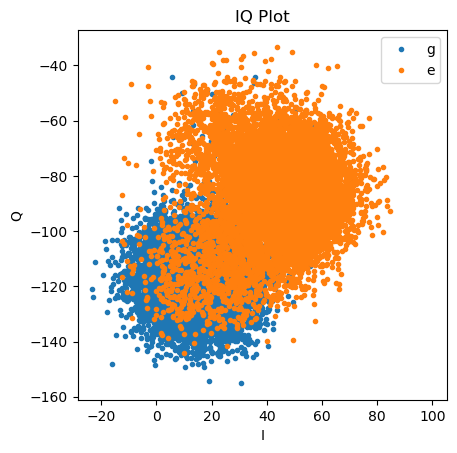

In [60]:
I_g = I_g_array[index_freq_0[0]][0][index_amp_0[0]][0]
Q_g = Q_g_array[index_freq_0[0]][0][index_amp_0[0]][0]
I_e = I_e_array[index_freq_0[0]][0][index_amp_0[0]][0]
Q_e = Q_e_array[index_freq_0[0]][0][index_amp_0[0]][0]
# I_g = I_g_array[9][0][15][0]
# Q_g = Q_g_array[9][0][15][0]
# I_e = I_e_array[9][0][15][0]
# Q_e = Q_e_array[9][0][15][0]
plt.title('IQ Plot')
plt.plot(I_g, Q_g, '.',label = 'g')
plt.plot(I_e, Q_e, '.',label = 'e')
plt.xlabel('I')
plt.ylabel('Q')
plt.legend()
plt.axis('square')
plt.show()

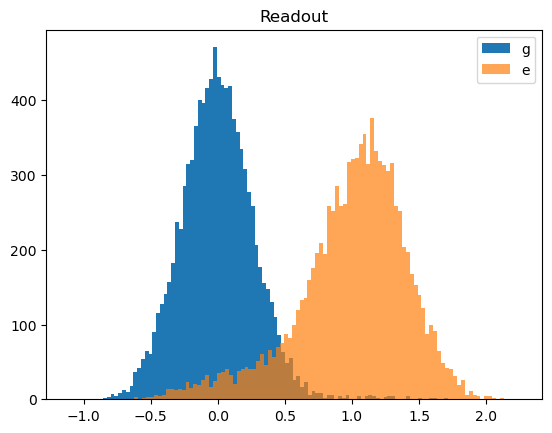

max fidelity =  0.861
sigma_g = 0.27849995222784985
sigma_e = 0.4098236780444059


In [61]:
vec_I = np.mean(I_e) - np.mean(I_g)
vec_Q = np.mean(Q_e) - np.mean(Q_g)
gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
estate = (I_e - np.mean(I_g))*vec_I + (Q_e - np.mean(Q_g))*vec_Q
gstate = gstate / abs(vec_I+1j*vec_Q)**2
estate = estate / abs(vec_I+1j*vec_Q)**2
plt.hist(gstate,bins = 100,label = 'g')
plt.hist(estate,bins = 100,label = 'e',alpha=0.7)
plt.legend()
plt.title("Readout")
plt.show()
th_min = min(gstate)
th_max = max(estate)
th_list = np.linspace(th_min,th_max,1000)
fidelity = [(sum(gstate<th)+sum(estate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
print('max fidelity = ',max(fidelity)*2-1)
print('sigma_g =',np.std(gstate))
print('sigma_e =',np.std(estate))

Optimal fidelity after rotation = 0.861


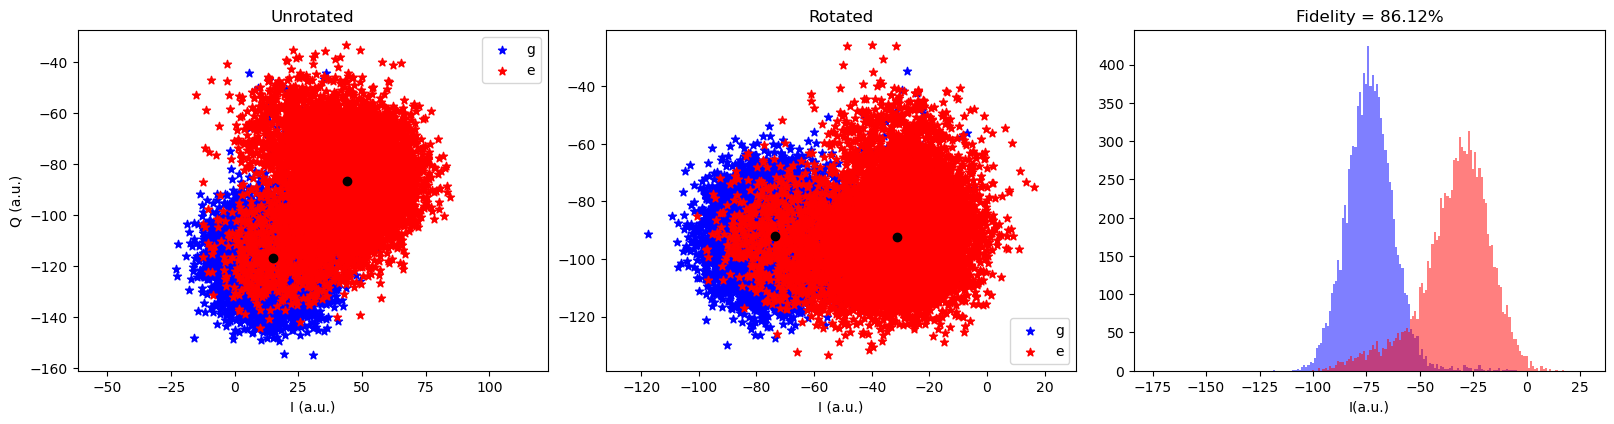

In [43]:
fid, threshold, angle = hist(data=[I_g, Q_g, I_e, Q_e],  plot=True, ran=100)
print('Optimal fidelity after rotation = %.3f' % fid)

In [ ]:
data = r"M:/malab\People\Santi\data\candle_qubit\00001_readout_opt_Q0_2024-10-09.h5"

with SlabFile(data, 'r') as f:
    freqs_list =  array(f['freqs_list'])[0]
    lengths_list = array(f['lengths_list'])[0]
    I_g_array = array(f['I_g_array'])[0]
    Q_g_array = array(f['Q_g_array'])[0]
    I_e_array = array(f['I_e_array'])[0]
    Q_e_array = array(f['Q_e_array'])[0]

freq_steps = len(freqs_list)
length_steps = len(lengths_list)

fid_Array =np.zeros([freq_steps,length_steps])
for index_freq in range(freq_steps):
    for index_length in range(length_steps):
        I_g = I_g_array[index_freq][0][index_length][0]
        Q_g = Q_g_array[index_freq][0][index_length][0]
        I_e = I_e_array[index_freq][0][index_length][0]
        Q_e = Q_e_array[index_freq][0][index_length][0]
        vec_I = np.mean(I_e) - np.mean(I_g)
        vec_Q = np.mean(Q_e) - np.mean(Q_g)
        gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
        estate = (I_e - np.mean(I_g))*vec_I + (Q_e - np.mean(Q_g))*vec_Q
        gstate = gstate / abs(vec_I+1j*vec_Q)**2
        estate = estate / abs(vec_I+1j*vec_Q)**2

        th_min = min(gstate)
        th_max = max(estate)
        th_list = np.linspace(th_min,th_max,1000)
        fidelity = [(sum(gstate<th)+sum(estate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
        fid_Array[index_freq,index_length] = max(fidelity)*2-1

print('\n data path:', data)

plt.figure(figsize=(24, 8), dpi=80)
figA = plt.pcolormesh(lengths_list,freqs_list,fid_Array)
figB = plt.contour(lengths_list,freqs_list,fid_Array, 10 ,colors='w')
plt.clabel(figB, figB.levels, inline=True, fontsize=20)
plt.xlabel(r"length, us")
plt.ylabel(r"Frequency, (MHz)")
plt.title(r"Fidelity, Discriminate g-e")
plt.colorbar(figA)
plt.show()

# Qubit Temp


 data path: M:/malab\People\Santi\data\candle_qubit\00000_qubit_temp_Q4_2024-10-27.h5
{'T': [1.7738872682794216, 0.6230590726603685],
 'amp': [-0.24552107760633118, 0.04375576861087672],
 'f': [2.6750975365562852, 0.04797946512168645],
 'fit_func': <function Fit.rabi.<locals>.<lambda> at 0x000001843AB07BA0>,
 'offset': [29.75856140909439, 0.014717939264995072],
 'phase': [4.894680357178871, 0.1263535545460162]}
Peak: 0.14419492868977604


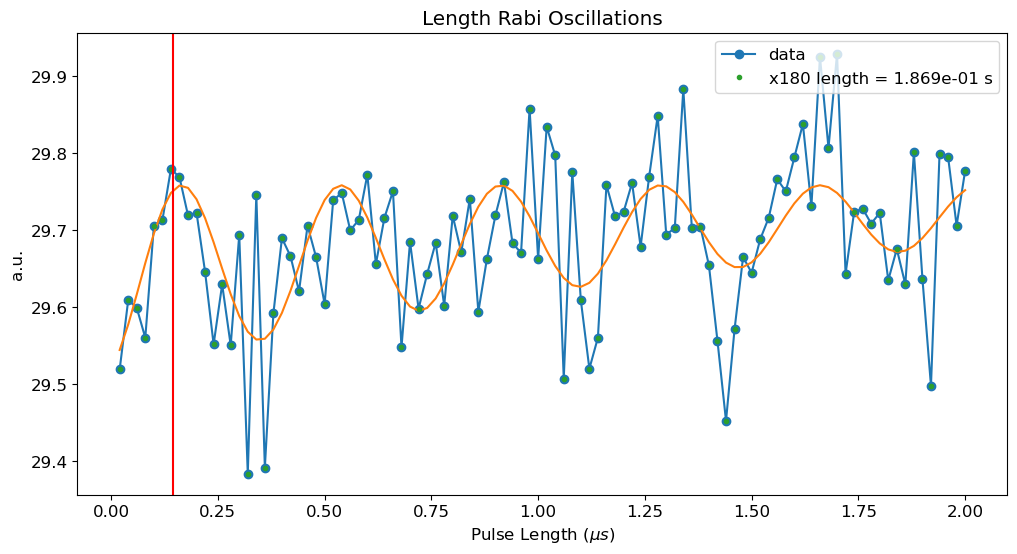

In [489]:
# data = r"M:/malab\People\Santi\data\candle_qubit\00000_time_rabi_ge_Q0_2024-10-10.h5"
data = r"M:/malab\People\Santi\data\candle_qubit\00000_qubit_temp_Q4_2024-10-27.h5"

SS = False
ef = True
with SlabFile(data, 'r') as f:
    lengths = array(f['lengths'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    I_ref = array(f['avgi_ref'])[0]
    Q_ref = array(f['avgq_ref'])[0]
    amps_ref = array(f['amps_ref'])[0]
    # fit_result_ref = f.attrs['fit_result_ref']
    # fit_result_ref = json.loads(fit_result_ref)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == 'True':
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
        if ef == True:
            If = array(f['I_f'])[0]
            Qf = array(f['Q_f'])[0]

# pp.pprint(config)

if SS == 'True':
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    # g-e discrimination
    pop_norm = abs(((I+1j*Q) - g)*(e - g) / abs(e - g)**2)
    pop_norm_ref = abs(((I_ref+1j*Q_ref) - g)*(e - g) / abs(e - g)**2)
    
    if ef == True: # in this case we are reading out e and f state
        f = np.mean((If+1j*Qf))
        # e-f discrimination
        pop_norm = abs(((I+1j*Q) - e)*(f - e) / abs(f - e)**2)
        pop_norm_ref = abs(((I_ref+1j*Q_ref) - e)*(f- e) / abs(f - e)**2)
        # g-f discrimation
        # pop_norm = abs(((I+1j*Q) - g)*(f- g) / abs(f - g)**2)
        # pop_norm_ref = abs(((I_ref+1j*Q_ref) - g)*(f- g) / abs(f - g)**2)
    ydata = pop_norm
    ydata_ref = pop_norm_ref
else:
    ydata = amps
    ydata_ref = amps_ref

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(lengths, ydata, marker='o', label='data')
# plt.plot(lengths, ydata_ref, marker='o', label='ref_data')
if SS == 'True':
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Pulse Length ($\mu s$)")
plt.title(r'Length Rabi Oscillations')
plt.legend()

fit = Fit()
# fit_results = fitdecaysin(lengths, ydata, showfit=True)
# pp.pprint(fit_results)
# peak = 0.5 / fit_results[1] + (fit_results[2]/(180*np.pi*fit_results[1]))
# print('Peak:', peak)
# plt.axvline(peak, marker='', c='green', linestyle='--')

# fit_results_ref = fitdecaysin(lengths, ydata_ref, showfit=True)
# pp.pprint(fit_results_ref)
# peak_ref = 0.5 / fit_results_ref[1] #- (fit_results_ref[2]/(360*np.pi*fit_results_ref[1]))
# print('Ref Peak:', peak_ref)
# plt.axvline(peak_ref, marker='', c='blue', linestyle='--')

fit_results = fit.rabi(lengths, ydata, plot = True)
pp.pprint(fit_results)
peak = 0.5 / fit_results['f'][0] - (fit_results['phase'][0]/(360/np.pi))
print('Peak:', peak)
plt.axvline(peak, marker='', c='red')

# fit_results_ref = fit.rabi(lengths, ydata_ref, plot = True)
# pp.pprint(fit_results_ref)

plt.show()

{'T': [1.7738872682794216, 0.6230590726603685],
 'amp': [-0.24552107760633118, 0.04375576861087672],
 'f': [2.6750975365562852, 0.04797946512168645],
 'fit_func': <function Fit.rabi.<locals>.<lambda> at 0x000001843AB82160>,
 'offset': [29.75856140909439, 0.014717939264995072],
 'phase': [4.894680357178871, 0.1263535545460162]}
Peak: 0.14419492868977604
[3.7125876213900195, 5.0, 90.0, 1.98, 26.60623962761035]
array([  3.84766296,   2.70966048, 270.83709939,  10.1281879 ,
        26.61602597])
Peak: 0.18452496281390812


C:\Users\G41Lab\AppData\Local\Temp\ipykernel_39248\974763096.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\G41Lab\AppData\Local\Temp\ipykernel_39248\974763096.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


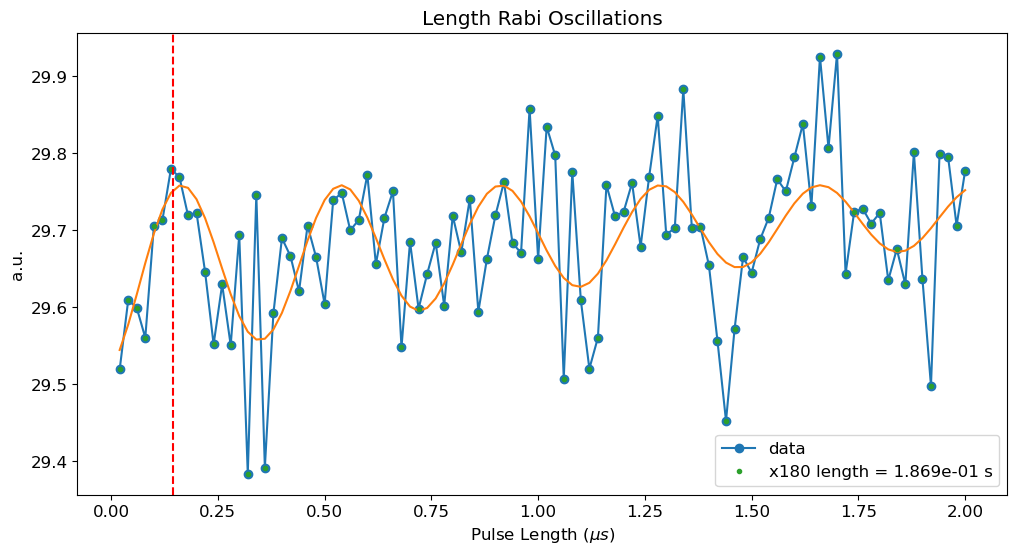

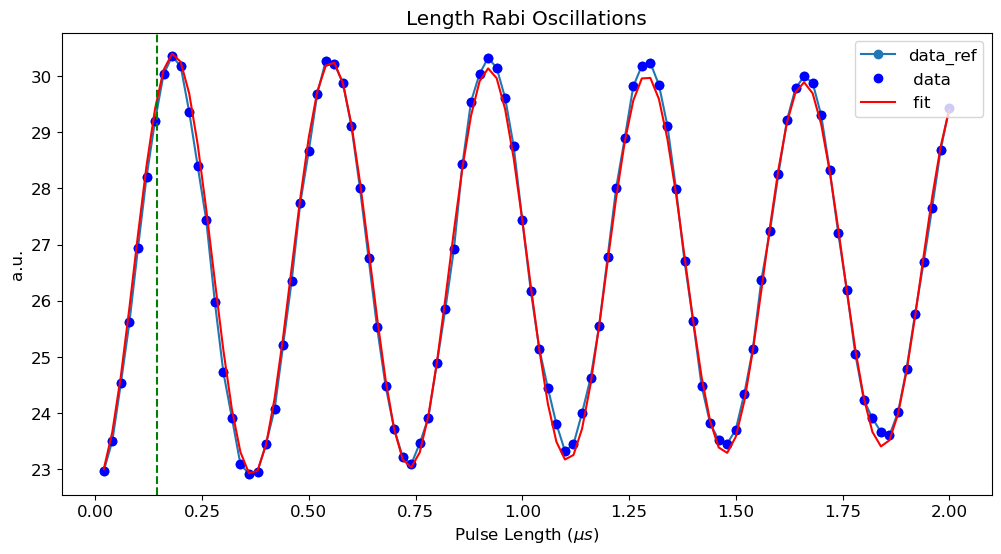

In [490]:
fig, ax0 = plt.subplots(1, figsize=(12,6))
fit = Fit()

ax0.plot(lengths, ydata, marker='o', label='data')
fit_func = True
if fit_func == True:
    fit_results = fit.rabi(lengths, ydata, plot = True)
    pp.pprint(fit_results)
    peak = 0.5 / fit_results['f'][0] - (fit_results['phase'][0]/(360/np.pi))
else:
    fit_results = fitdecaysin(lengths, ydata, showfit=True)
    pp.pprint(fit_results)
    peak = 0.5 / fit_results[1] - (fit_results[2]/(180*np.pi*fit_results[1]))

print('Peak:', peak)
ax0.axvline(peak, marker='', c='red', linestyle='--')

if SS == 'True':
    ax0.set_ylabel("Qubit Population")
else:
    ax0.set_ylabel("a.u.")
ax0.set_xlabel(r"Pulse Length ($\mu s$)")
ax0.set_title(r'Length Rabi Oscillations')
ax0.legend()
fig.show()

fig, ax1 = plt.subplots(1, figsize=(12,6))
ax1.plot(lengths, ydata_ref, marker='o', label='data_ref')
fit_func = False
if fit_func == True:
    fit_results_ref = fit.rabi(lengths, ydata_ref, plot = True)
    pp.pprint(fit_results_ref)
    peak_ref = 0.5 / fit_results_ref['f'][0] - (fit_results_ref['phase'][0]/(360/np.pi))
else:
    fit_results_ref = fitdecaysin(lengths, ydata_ref, showfit=True)
    pp.pprint(fit_results_ref)
    peak_ref = 0.5 / fit_results_ref[1] #- (fit_results_ref[2]/((180/np.pi)))

print('Peak:', peak_ref)
ax1.axvline(peak, marker='', c='green', linestyle='--')

if SS == 'True':
    ax1.set_ylabel("Qubit Population")
else:
    ax1.set_ylabel("a.u.")
ax1.set_xlabel(r"Pulse Length ($\mu s$)")
ax1.set_title(r'Length Rabi Oscillations')
ax1.legend()

fig.show()

Calculating thermal population using https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.110.120501

From the two oscillation amplitudes, an estimate of the population and its associated standard deviation can be calculated from P_e = A_e / (A_e + A_g)

In [491]:
# Values from fitting
A_e = fit_results_ref[0]*2
# A_g = fit_results[0]

# A_e = fit_results_ref['amp'][0]
A_g = fit_results['amp'][0]

P = np.abs(A_g / (A_e + A_g))

print(P)

0.03295671262561824


In [492]:
def Qubit_Temperature_Convert(pop_e, Omega_q):
    s = pop_e
    Omega_q = Omega_q * 2*np.pi* 1e9 # Omega_q in the unit Hz
    k_B = 1.38 * 10**-23
    hbar = 1.05 * 10**-34
    T = hbar * Omega_q/(k_B * np.log((1-s)/s)) # Temperature in the unit Klevin
    return T

In [493]:
qubit_freqs = [2.96295, 3.156504, 3.098868, 3.285196, 3.25550, 3.294782]
Qubit_Temperature_Convert(P, qubit_freqs[4])

0.046058880880315